In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<font face='Times New Roman'><h1>1 Load Dataset

In [2]:
kpmg = "https://cdn-assets.theforage.com/vinternship_modules/kpmg_data_analytics/KPMG_VI_New_raw_data_update_final.xlsx"

xls = pd.ExcelFile(kpmg)

sheet_names = xls.sheet_names

In [3]:
sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [4]:
dfs = {}

In [5]:
for sheet_name in sheet_names:
    dfs[sheet_name] = pd.read_excel(xls, sheet_name=sheet_name, header=None)
    dfs[sheet_name] = dfs[sheet_name].tail(-1)
    dfs[sheet_name].columns = dfs[sheet_name].iloc[0]
    dfs[sheet_name] = dfs[sheet_name][1:]
    dfs[sheet_name] = dfs[sheet_name].reset_index(drop=True)

In [6]:
Transactions = dfs['Transactions']
CustomerDemographic = dfs['CustomerDemographic']
CustomerAddress = dfs['CustomerAddress']

<font face="Comfortaa"><h1> 2 Data Validation</h1>
    <font face="Comfortaa"><h2>2.1 Transactions</h2>

In [7]:
Transactions.head()

1,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [8]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [9]:
#convert excel serial to date
base_date = datetime(1900, 1, 1)

def excel_serial_to_date(serial):
    if pd.isnull(serial):
        return pd.NaT  # Return NaT if the value is NaN or NaT
    return base_date + timedelta(days=serial - 2)

In [10]:
Transactions.describe(include='all')

1,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


<font face="Comfortaa"><h4> Documentation </h4>
    <h5><b>Numerical Variable:</b></h5>Columns <b>transaction_id</b>, <b>product_id</b>, <b>customer_id</b> are converted into integer. <b>list_price</b> & <b>standard_cost</b> are converted into float. 
    <h5><b>Binary Variable</b></h5>Columns <b>online_order</b>, <b>order_status</b> are binary variable (categorical) because they have distinct categories or levels, and they are used to indicate the presence or absence of a particular attribute or event.
    <h5><b>Categorical Variable</b></h5>Columns <b>brand</b>, <b>product_line</b>, <b>product_class</b>, <b>product_size</b> will also be converted to category type. 
    <h5><b>Date Time Variable</b></h5>Columns <b>product_first_sold_date</b> & <b>transaction_date</b> will also be converted to category type. 

In [11]:
#excel data convert
Transactions['product_first_sold_date'] = Transactions['product_first_sold_date'].apply(excel_serial_to_date)

#transaction date
Transactions['transaction_date'] = pd.to_datetime(Transactions['transaction_date'])

#primary key & foreign key 
Transactions['transaction_id'] = Transactions['transaction_id'].astype('int')
Transactions['product_id'] = Transactions['product_id'].astype('int')
Transactions['customer_id'] = Transactions['customer_id'].astype('int')

#price & cost 
Transactions['list_price'] = Transactions['list_price'].astype('float')
Transactions['standard_cost'] = Transactions['standard_cost'].astype('float')

#product details 
Transactions['brand'] = Transactions['brand'].astype('category')
Transactions['product_line'] = Transactions['product_line'].astype('category')
Transactions['product_class'] = Transactions['product_class'].astype('category')
Transactions['product_size'] = Transactions['product_size'].astype('category')

In [12]:
Transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [13]:
Transactions = Transactions[Transactions['order_status']=='Approved']

In [14]:
Transactions.isnull().sum()

1
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               354
order_status                 0
brand                      196
product_line               196
product_class              196
product_size               196
list_price                   0
standard_cost              196
product_first_sold_date    196
dtype: int64

<font face="Comfortaa"><h2>Transactions</h2>
The **Transactions** contains 20000 rows and 13 columns with missing values before cleaning.

<font face="Comfortaa"><ul>
    <li> **transaction_id**: Exhibiting unique entries without any missing values or duplicates.</li><li>**product_id**: Exhibiting unique entries without any missing values or duplicates.</li><li>**customer_id**:  Exhibiting unique entries without any missing values or duplicates.</li><li>**transaction_date**: Ranging between 1/1/2017 and 12/31/2017. No missing values are present in this column, and no changes have been applied.</li><li>**online_order**: The 'online_order' column encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied.</li><li>**order_status**: The 'order_status' column encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied. All order_status = 'Cancelled' were dropped to ensure all records listed are Approved transactions.</li><li>**brand**: The 'brand' column encompasses 6 distinct categories. All 196 missing values were left untouched.</li><li>**product_line**: TThe 'product_line' column encompasses 4 distinct categories. All 196 missing values were left untouched.</li><li>**product_class**: The 'product_class' column encompasses 3 distinct categories. All 196 missing values were left untouched.</li><li>**product_size**: The 'product_size' column encompasses 3 distinct categories. All 196 missing values were left untouched.</li><li>**list_price**: Ranges between 12 and 2091. No missing values are present in this column, and no changes have been applied.</li><li>**standard_cost**:  Ranges between 7 and 1759. All 196 missing values were left untouched.</li><li>**product_first_sold_date**: Ranges between 1991 and 2016. All 196 missing values were left untouched.


<font face="Comfortaa">After the data validation, the dataset contains **19821 rows and 13 columns**.

<font face="Comfortaa"><h2>2.2 CustomerAddress</h2>

In [15]:
CustomerAddress.head()

1,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [16]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [17]:
CustomerAddress['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [18]:
state_map = {'New South Wales':'NSW', 'Victoria':'VIC'}
CustomerAddress['state'] = CustomerAddress['state'].replace(state_map)

In [19]:
CustomerAddress['customer_id'] = CustomerAddress['customer_id'].astype('int')
CustomerAddress['postcode'] = CustomerAddress['postcode'].astype('int')
CustomerAddress['property_valuation'] = CustomerAddress['property_valuation'].astype('int')
CustomerAddress['country'] = CustomerAddress['country'].astype('category')
CustomerAddress['state'] = CustomerAddress['state'].astype('category')

In [20]:
CustomerAddress.describe(include='all')

1,customer_id,address,postcode,state,country,property_valuation
count,3999.000000,3999,3999.000000,3999,3999,3999.000000
unique,NaN,3996,NaN,3,1,NaN
top,NaN,3 Mariners Cove Terrace,NaN,NSW,Australia,NaN
freq,NaN,2,NaN,2140,3999,NaN
mean,2003.987997,NaN,2985.755939,NaN,NaN,7.514379
std,1154.576912,NaN,844.878364,NaN,NaN,2.824663
min,1.000000,NaN,2000.000000,NaN,NaN,1.000000
25%,1004.500000,NaN,2200.000000,NaN,NaN,6.000000
50%,2004.000000,NaN,2768.000000,NaN,NaN,8.000000
75%,3003.500000,NaN,3750.000000,NaN,NaN,10.000000


<font face='Comfortaa'><h2>CustomerAddress</h2>
    The <b>CustomerAddress</b> contains 3999 rows and 6 columns with missing values before cleaning.
    
<font face="Comfortaa"><ul>
    <li> **customer_id**: Exhibiting unique entries without any missing values or duplicates.</li><li>**address**: No missing values are present in this column, and no changes have been applied.</li><li>**postcode**:  No missing values are present in this column, and no changes have been applied.</li><li>**postcode**:  No missing values are present in this column, and no changes have been applied.</li><li>**state**: The state column should encompasses 3 distinct categories. To ensure consistency within the dataset, instances containing 'New South Wales' have been replaced with 'NSW' while 'Victoria' have been replaced with 'VIC'.</li><li>**country**: No missing values are present in this column, and no changes have been applied.</li><li>**property_valuation**: No missing values are present in this column, and no changes have been applied.</li>


<font face="Comfortaa">
After the data validation, the dataset contains **3999 rows and 6 columns**.</font>

<font face='Comfortaa'><h2>2.3 CustomerDemographic</h2>

In [21]:
CustomerDemographic.head()

1,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [22]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [23]:
#drop redundant columns & name for privacy
CustomerDemographic = CustomerDemographic.drop(axis =1, columns=['default','first_name','last_name'])

In [24]:
#drop missing values with <5%
cols_to_drop = CustomerDemographic.columns[CustomerDemographic.isna().sum() <= len(CustomerDemographic) * 0.05]
CustomerDemographic = CustomerDemographic.dropna(subset = cols_to_drop)

In [25]:
#primary key
CustomerDemographic['customer_id'] = CustomerDemographic['customer_id'].astype('int')

#numerical
CustomerDemographic['past_3_years_bike_related_purchases'] = CustomerDemographic['past_3_years_bike_related_purchases'].astype('int')
CustomerDemographic['tenure'] = CustomerDemographic['tenure'].astype('int')

#date
CustomerDemographic['DOB'] = pd.to_datetime(CustomerDemographic['DOB'])

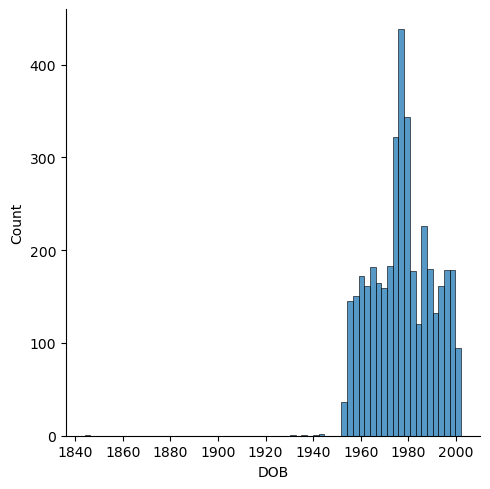

In [26]:
sns.displot(data = CustomerDemographic, x = 'DOB', kind='hist')
plt.show()

<font face='Comfortaa'> 
    There are extreme outliers present at the lower, considering 70 y/o is the threshold age of cyclist. The customer with year of birth date earlier than 1953 was replaced by median of the 

In [27]:
CustomerDemographic.loc[CustomerDemographic['DOB'].dt.year < 1953]

1,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
33,34,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20
657,658,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8
719,720,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6
1091,1092,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5
2412,2413,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17
3409,3410,Female,93,1940-09-22,NaN,Property,Mass Customer,N,No,16


In [28]:
birth_year = CustomerDemographic['DOB'].dt.year
birth_year.median()

1977.0

In [29]:
DOB_to_replace = CustomerDemographic[CustomerDemographic['DOB'].dt.year < 1953]['DOB']
CustomerDemographic.loc[DOB_to_replace.index, 'DOB'] = DOB_to_replace.apply(lambda x: x.replace(year=1977))

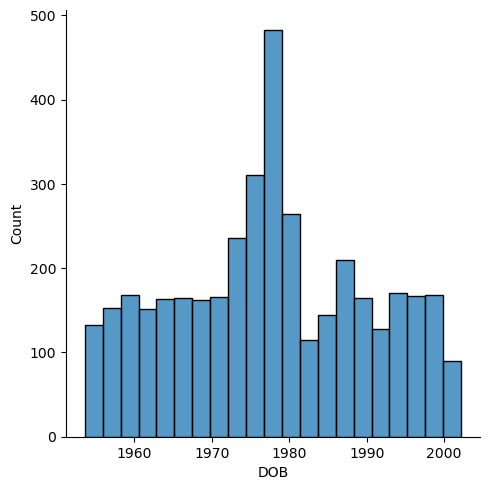

In [30]:
sns.displot(data = CustomerDemographic, x = 'DOB', kind='hist')
plt.show()

In [31]:
last_transaction_date = Transactions['transaction_date'].max()

In [32]:
CustomerDemographic['age'] = last_transaction_date.year - CustomerDemographic['DOB'].dt.year
CustomerDemographic['age'] = CustomerDemographic['age'].astype('int')

In [33]:
gender_map = {"F":"Female", "Femal":"Female", "M":"Male"}
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace(gender_map)

In [34]:
#category
CustomerDemographic['gender'] = CustomerDemographic['gender'].astype('category')
CustomerDemographic['job_title'] = CustomerDemographic['job_title'].astype('category')
CustomerDemographic['job_industry_category'] = CustomerDemographic['job_industry_category'].astype('category')
CustomerDemographic['wealth_segment'] = CustomerDemographic['wealth_segment'].astype('category')
CustomerDemographic['deceased_indicator'] = CustomerDemographic['deceased_indicator'].astype('category')
CustomerDemographic['owns_car'] = CustomerDemographic['owns_car'].astype('category')

In [35]:
CustomerDemographic.describe(include='all', datetime_is_numeric=True)

1,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
count,3913.000000,3913,3913.000000,3913,3416,3257,3913,3913,3913,3913.000000,3913.000000
unique,NaN,3,NaN,NaN,195,9,3,2,2,NaN,NaN
top,NaN,Female,NaN,NaN,Business Systems Development Analyst,Manufacturing,Mass Customer,N,Yes,NaN,NaN
freq,NaN,2039,NaN,NaN,43,796,1954,3911,1974,NaN,NaN
mean,1999.325837,NaN,49.041912,1977-08-12 10:16:02.330692576,NaN,NaN,NaN,NaN,NaN,10.657041,39.886021
min,1.000000,NaN,0.000000,1953-08-09 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,15.000000
25%,1002.000000,NaN,24.000000,1968-02-16 00:00:00,NaN,NaN,NaN,NaN,NaN,6.000000,30.000000
50%,1999.000000,NaN,48.000000,1977-08-04 00:00:00,NaN,NaN,NaN,NaN,NaN,11.000000,40.000000
75%,2997.000000,NaN,73.000000,1987-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,15.000000,49.000000
max,4000.000000,NaN,99.000000,2002-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,22.000000,64.000000


In [36]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int32         
 1   gender                               3913 non-null   category      
 2   past_3_years_bike_related_purchases  3913 non-null   int32         
 3   DOB                                  3913 non-null   datetime64[ns]
 4   job_title                            3416 non-null   category      
 5   job_industry_category                3257 non-null   category      
 6   wealth_segment                       3913 non-null   category      
 7   deceased_indicator                   3913 non-null   category      
 8   owns_car                             3913 non-null   category      
 9   tenure                               3913 non-null   int32         
 10  age         

In [37]:
CustomerDemographic.isnull().sum()

1
customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
age                                      0
dtype: int64

<font face='Comfortaa'><h2>CustomerDemographic</h2></font>
<font face='Comfortaa'>
The **CustomerDemographic** contains 4000 rows and 10 columns with missing values before cleaning.</font>
<font face='Comfortaa'><ul><li> **customer_id**: Exhibiting unique entries without any missing values or duplicates.</li><li>**gender**: The 'gender' column should encompasses 3 distinct categories. To ensure consistency within the dataset, instances containing 'Femal', 'F' have been replaced with 'Female' while 'M' have been replaced with 'Male'.</li><li>**past_3_years_bike_related_purchases**: Ranging between 0 and 100. No missing values are present in this column, and no changes have been applied.</li><li>**DOB**: Birth Year Ranging between 1843 and 2002. There were 87 instances with missing values, which were dropped because the missing values is less than 5% of overall data. Birth Year with earlier than  1953 were all replaced by median.</li><li>**job_title**: All 497 instances with missing values were left untouched.</li><li>**job_industry_category**: The 'job_industry_category' column encompasses 9 distinct categories. All 656 instances with missing values were left untouched.</li><li>**wealth_segment**: The 'job_industry_category' column encompasses 3 distinct categories. No missing values are present in this column, and no changes have been applied.</li><li>deceased_indicator**: The 'deceased_indicator' column encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied.</li><li>**owns_car**: The 'owns_car' column encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied.</li><li>**tenure**: Ranging between 0 and 100. There were 87 instances with missing values, which were dropped because the missing values is less than 5% of overall data.</li>

<font face='Comfortaa'>**Added Feature**
<font face='Comfortaa'><ul><li>**age**: The age column was calculated by subtracting the year of last transaction date by the year of DOB. <br>          After the data validation, the dataset contains **3913 rows and 11 columns**.</li>
    


<font face="Comfortaa">
After the data validation, the dataset contains **3999 rows and 6 columns**.</font>

<font face='Comfortaa'><h2> 2.4 RFM Analysis

In [38]:
last_transaction_date

Timestamp('2017-12-30 00:00:00')

In [39]:
RFM = Transactions.groupby('customer_id').agg(
    last_transaction_date=('transaction_date', 'max'),
    frequency=('transaction_id', 'count'),
    monetary=('list_price', 'sum')
).reset_index()
RFM

,customer_id,last_transaction_date,frequency,monetary
0,1,2017-12-23,11,9084.45
1,2,2017-08-24,3,4149.07
2,3,2017-09-19,8,9888.23
3,4,2017-06-18,2,1047.72
4,5,2017-12-14,6,5903.20
...,...,...,...,...
3488,3497,2017-11-08,3,3744.07
3489,3498,2017-08-25,6,5177.06
3490,3499,2017-11-09,7,7673.48
3491,3500,2017-08-08,6,4922.41


In [40]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            3493 non-null   int64         
 1   last_transaction_date  3493 non-null   datetime64[ns]
 2   frequency              3493 non-null   int64         
 3   monetary               3493 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 109.3 KB


In [41]:
RFM['recency'] = last_transaction_date - pd.to_datetime(RFM['last_transaction_date'])

In [42]:
def calculate_score(value):
    percentile_20 = np.percentile(value, 20)
    percentile_40 = np.percentile(value, 40)
    percentile_60 = np.percentile(value, 60)
    percentile_80 = np.percentile(value, 80)

    val_scores = []
    for val in value:
        if val <= percentile_20:
            val_scores.append("1")
        elif val <= percentile_40:
            val_scores.append("2")
        elif val <= percentile_60:
            val_scores.append("3")
        elif val <= percentile_80:
            val_scores.append("4")
        else:
            val_scores.append("5")
    
    return val_scores

In [43]:
def calculate_r_score(value):
    percentile_20 = np.percentile(value, 20)
    percentile_40 = np.percentile(value, 40)
    percentile_60 = np.percentile(value, 60)
    percentile_80 = np.percentile(value, 80)

    val_scores = []
    for val in value:
        if val <= percentile_20:
            val_scores.append("5")
        elif val <= percentile_40:
            val_scores.append("4")
        elif val <= percentile_60:
            val_scores.append("3")
        elif val <= percentile_80:
            val_scores.append("2")
        else:
            val_scores.append("1")
    
    return val_scores

In [44]:
RFM['R Score'] = calculate_r_score(RFM['recency'])
RFM['F Score'] = calculate_score(RFM['frequency'])
RFM['M Score'] = calculate_score(RFM['monetary'])

In [45]:
RFM['RFM Score'] = RFM['R Score'].astype('str')+RFM['F Score'].astype('str')+RFM['M Score'].astype('str')

<font face='Comfortaa'><h3> 2.4.1 RFM Score

In [46]:
rfm_score = pd.read_excel('assets/RFM scores.xlsx')

In [47]:
rfm_score

,Segment,Scores
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 231, 241, 251, 233, 232, 223, 222, 1..."


In [48]:
rfm_score = rfm_score['Scores'].str.split(',').explode().str.split(' ').explode().reset_index()\
.merge(rfm_score.reset_index()[['index','Segment']], on = 'index')

In [49]:
rfm_score = rfm_score[rfm_score['Scores'] !='']

In [50]:
rfm_score = rfm_score.drop_duplicates(subset='Scores')

In [51]:
rfm_score.head()

,index,Scores,Segment
0,0,555,Champions
2,0,554,Champions
4,0,544,Champions
6,0,545,Champions
8,0,454,Champions


In [52]:
RFM.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555
1,2,2017-08-24,3,4149.07,128 days,1,1,2,112
2,3,2017-09-19,8,9888.23,102 days,1,4,5,145
3,4,2017-06-18,2,1047.72,195 days,1,1,1,111
4,5,2017-12-14,6,5903.20,16 days,4,3,3,433


<font face='Comfortaa'><h3> 2.4.2 Customer Segmentation

In [53]:
RFM = RFM.merge(rfm_score, left_on = 'RFM Score', right_on='Scores')

In [54]:
RFM.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score,index,Scores,Segment
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555,0,555,Champions
1,25,2017-12-25,12,9996.33,5 days,5,5,5,555,0,555,Champions
2,37,2017-12-23,9,11291.71,7 days,5,5,5,555,0,555,Champions
3,89,2017-12-26,9,12741.44,4 days,5,5,5,555,0,555,Champions
4,109,2017-12-22,10,10661.51,8 days,5,5,5,555,0,555,Champions


In [55]:
RFM['Segment'].value_counts()

Hibernating customers    563
Champions                463
New Customers            426
At Risk                  411
Loyal                    377
Lost customers           365
Potential Loyalist       277
Need Attention           216
Promising                195
About To Sleep           114
Cannot Lose Them          86
Name: Segment, dtype: int64

<font face='Comfortaa'><h3> 2.4.3 High value Lead

<font face='Comfortaa'><h3>
    **Customer RFM Scores Alongside Demographic and Address Information**<br></h3>
The RFM scores for each individual customer, accompanied by their comprehensive demographic and address particulars, were computed utilizing the methodology delineated within the following <a href='https://ploiitubsamon.medium.com/rfm-analysis-for-customer-segmentation-with-power-bi-5d2f5bd62038'>RFM ANALYSIS blog</a>. Subsequent to the calculation of RFM scores, customers were categorized into distinct segments based on the prescribed table within the same blog post. As part of the subsequent process involving the construction of a classification model, a supplementary column will be introduced. This column will assign a value of 1 to customers categorized as "Champions" or "Loyal," while assigning a value of 0 to those falling under other segments.

In [56]:
demographic = CustomerDemographic.merge(CustomerAddress)

In [57]:
demographic.head()

1,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,64,060 Morning Avenue,2016,NSW,Australia,10
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,37,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7,56,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8,40,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13,51,9 Oakridge Court,3216,VIC,Australia,9


In [58]:
RFM.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score,index,Scores,Segment
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555,0,555,Champions
1,25,2017-12-25,12,9996.33,5 days,5,5,5,555,0,555,Champions
2,37,2017-12-23,9,11291.71,7 days,5,5,5,555,0,555,Champions
3,89,2017-12-26,9,12741.44,4 days,5,5,5,555,0,555,Champions
4,109,2017-12-22,10,10661.51,8 days,5,5,5,555,0,555,Champions


In [59]:
high_lead_val = ["Champions","Loyal"]

RFM['high_val_lead'] = RFM['Segment'].apply(lambda x: 1 if x in high_lead_val else 0)

In [60]:
RFM.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score,index,Scores,Segment,high_val_lead
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555,0,555,Champions,1
1,25,2017-12-25,12,9996.33,5 days,5,5,5,555,0,555,Champions,1
2,37,2017-12-23,9,11291.71,7 days,5,5,5,555,0,555,Champions,1
3,89,2017-12-26,9,12741.44,4 days,5,5,5,555,0,555,Champions,1
4,109,2017-12-22,10,10661.51,8 days,5,5,5,555,0,555,Champions,1


In [61]:
RFM = RFM[['customer_id', 'high_val_lead']]

In [62]:
demographic_RFM = RFM.merge(demographic)

In [63]:
demographic_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3412 entries, 0 to 3411
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3412 non-null   int64         
 1   high_val_lead                        3412 non-null   int64         
 2   gender                               3412 non-null   category      
 3   past_3_years_bike_related_purchases  3412 non-null   int32         
 4   DOB                                  3412 non-null   datetime64[ns]
 5   job_title                            2997 non-null   category      
 6   job_industry_category                2852 non-null   category      
 7   wealth_segment                       3412 non-null   category      
 8   deceased_indicator                   3412 non-null   category      
 9   owns_car                             3412 non-null   category      
 10  tenure      

In [64]:
demographic_RFM.describe(include='all',datetime_is_numeric=True )

,customer_id,high_val_lead,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation
count,3412.000000,3412.000000,3412,3412.000000,3412,2997,2852,3412,3412,3412,3412.000000,3412.000000,3412,3412.000000,3412,3412,3412.000000
unique,NaN,NaN,3,NaN,NaN,195,9,3,2,2,NaN,NaN,3410,NaN,3,1,NaN
top,NaN,NaN,Female,NaN,NaN,Business Systems Development Analyst,Manufacturing,Mass Customer,N,Yes,NaN,NaN,3 Talisman Place,NaN,NSW,Australia,NaN
freq,NaN,NaN,1757,NaN,NaN,38,700,1702,3411,1723,NaN,NaN,2,NaN,1823,3412,NaN
mean,1751.080598,0.238570,NaN,48.977140,1977-09-23 21:24:41.359906208,NaN,NaN,NaN,NaN,NaN,10.683177,39.770809,NaN,2989.771395,NaN,NaN,7.517878
min,1.000000,0.000000,NaN,0.000000,1953-08-09 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,15.000000,NaN,2000.000000,NaN,NaN,1.000000
25%,877.750000,0.000000,NaN,24.000000,1968-05-21 12:00:00,NaN,NaN,NaN,NaN,NaN,6.000000,30.000000,NaN,2200.000000,NaN,NaN,6.000000
50%,1750.500000,0.000000,NaN,48.000000,1977-09-01 12:00:00,NaN,NaN,NaN,NaN,NaN,11.000000,40.000000,NaN,2768.000000,NaN,NaN,8.000000
75%,2623.250000,0.000000,NaN,73.000000,1987-03-27 06:00:00,NaN,NaN,NaN,NaN,NaN,15.000000,49.000000,NaN,3756.000000,NaN,NaN,10.000000
max,3500.000000,1.000000,NaN,99.000000,2002-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,22.000000,64.000000,NaN,4883.000000,NaN,NaN,12.000000


<font face='Comfortaa'><h2> 3 Feature Selection

<font face='Comfortaa'> Partial columns are dropped prior Feature Selection to ensure better model performance with predictive model.

In [65]:
demographic_RFM = demographic_RFM.drop(axis=1, columns=['DOB','customer_id', 'job_title', 'job_industry_category','deceased_indicator', 'address', 'postcode', 'country'])
demographic_RFM = demographic_RFM[['past_3_years_bike_related_purchases', 'tenure', 'property_valuation' , 'age', \
                                   'gender', 'wealth_segment', 'owns_car', 'state', 'high_val_lead']]

In [66]:
demographic_RFM.head()

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender,wealth_segment,owns_car,state,high_val_lead
0,93,11,10,64,Female,Mass Customer,Yes,NSW,1
1,72,21,3,41,Male,Mass Customer,Yes,QLD,1
2,46,16,1,32,Female,High Net Worth,No,QLD,1
3,74,14,11,50,Male,Mass Customer,Yes,NSW,1
4,16,4,11,39,Male,Affluent Customer,Yes,NSW,1


In [67]:
features = demographic_RFM.drop(axis=1, columns=['high_val_lead'])
y = demographic_RFM['high_val_lead']

In [68]:
features = pd.get_dummies(features, drop_first=True)
features.head()

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender_Male,gender_U,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC
0,93,11,10,64,0,0,0,1,1,0,0
1,72,21,3,41,1,0,0,1,1,1,0
2,46,16,1,32,0,0,1,0,0,1,0
3,74,14,11,50,1,0,0,1,1,0,0
4,16,4,11,39,1,0,0,0,1,0,0


In [69]:
features_cat = features.iloc[:,4:]
features_num = features.iloc[:,:4]

In [70]:
X_num = features_num.values
X_cat = features_cat.values

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [72]:
X_num = scaler.fit_transform(X_num)
X = np.concatenate((X_num, X_cat), axis=1)

<font face='Comfortaa'><h2> 3 Train Validation Test Split

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [74]:
X.shape[1]

11

<font face='Comfortaa'><h2> 4 Define Functions

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def scores(y_val, y_pred):
    cm = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Avoid division by zero
    f1 = f1_score(y_val, y_pred)

    # Print the calculated metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall (Sensitivity):", recall)
    print("Specificity:", specificity)
    print("F1-Score:", f1)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

def confusion_matrix_(y_val,y_pred):
    confusion_matrix_ = confusion_matrix(y_val,y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
    cm_display.plot()
    plt.show()

<font face='Comfortaa'><h2> 5 Base Model

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
LR = LogisticRegression(random_state = 28)

In [79]:
LR.fit(X_train, y_train)

LogisticRegression(random_state=28)

In [80]:
y_pred = LR.predict(X_val)

In [81]:
scores(y_val, y_pred)

Accuracy: 0.7408491947291361
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


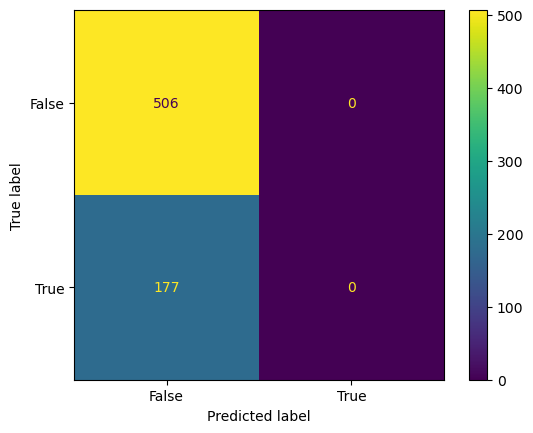

In [82]:
confusion_matrix_(y_val,y_pred)

<font face='Comfortaa'> Considering the confusion matrix and performance metrics, the initial model faced challenges in accurately predicting true positive labels. This difficulty might be attributed to the extensive number of categorical features, approximately 3000 after applying the "get_dummies" method. Therefore, the subsequent course of action should involve feature selection.

<font face='Comfortaa'><h2> 6 Model Development

<font face='Comfortaa'><h3> 6.1 Feature Selection

<font face='Comfortaa'><h4> 6.1.2 Random Forest Classifier Feature Importance

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have already defined X and y

models = {
    "Random Forest": RandomForestClassifier(random_state=28),
    "Gradient Boosting": GradientBoostingClassifier(random_state=28)
}

feature_importance = {
    'model': [],
    'value': [],
    'feature_no': []
}

for model_name, model_instance in models.items():
    model_instance.fit(X, y)
    importances = model_instance.feature_importances_
    for i, importance in enumerate(importances):
        feature_importance['model'].append(model_name)
        feature_importance['value'].append(importance)
        feature_importance['feature_no'].append(i)


In [84]:
feature_importance_rf_gb = pd.DataFrame({'model':feature_importance['model'],\
                          'value': feature_importance['value'],\
                            'feature_no': feature_importance['feature_no']
                            })

In [85]:
feature_importance_rf_gb = feature_importance_rf_gb.sort_values(by=['value'], ascending=False)

<font face='Comfortaa'><h4> 6.1.3 Feature Selection

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [87]:
# Initialize the models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000,random_state=28),
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=28),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=28),
    'RandomForestClassifier': RandomForestClassifier(random_state=28),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=28),
    'XGBClassifier': XGBClassifier(random_state=28)
}

In [88]:
# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'Specificity': [],
    'F1 Score': [],
    'n_features':[],
    'fp':[],
    'tp':[],
    'tn':[],
    'fn':[],
    'fi_model':[]
}

LogisticRegression
1
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


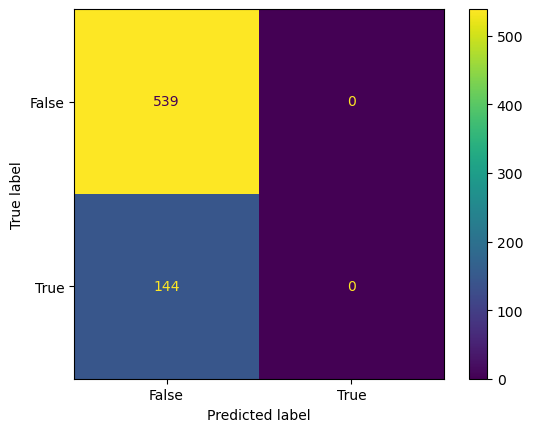

LogisticRegression
2
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


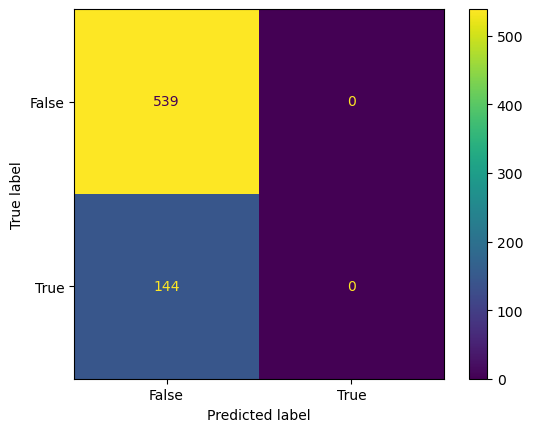

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
3
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


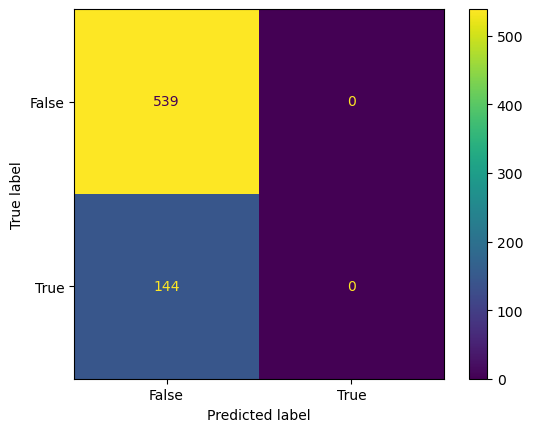

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
4
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


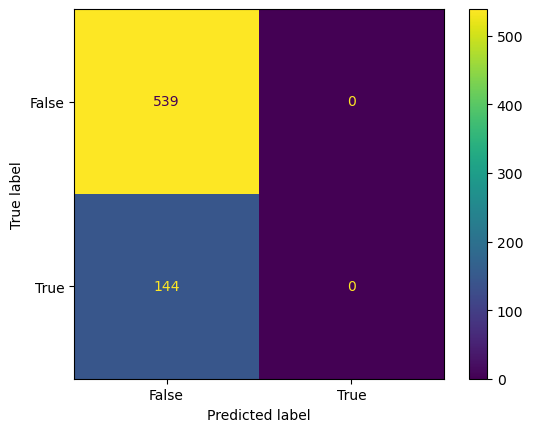

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
5
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


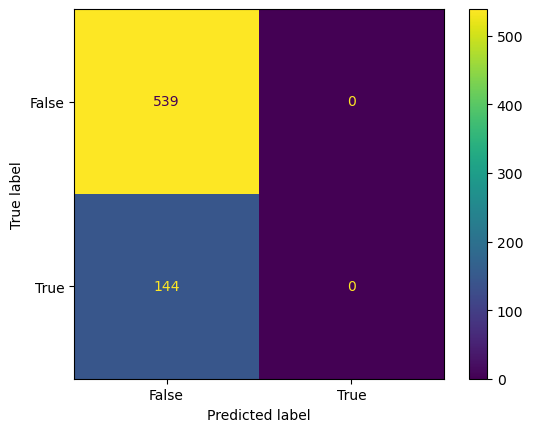

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
6
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


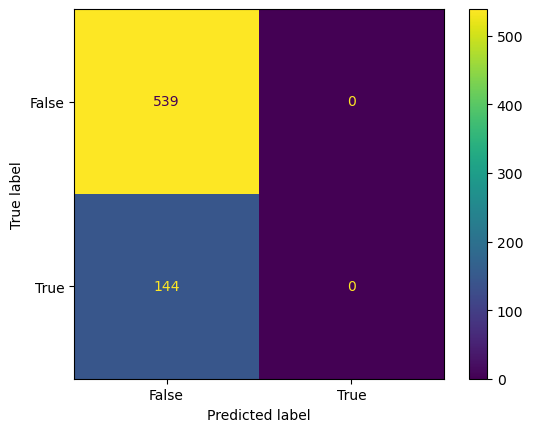

LogisticRegression
7
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


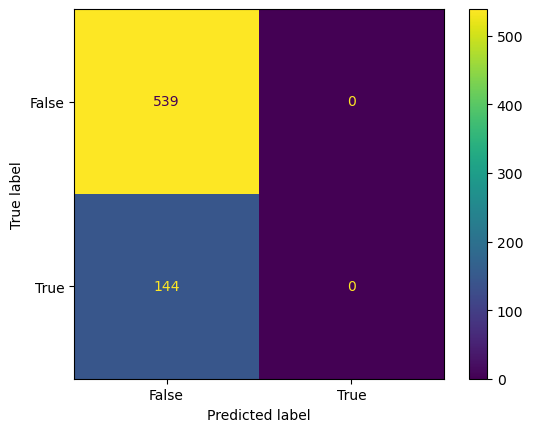

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
8
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


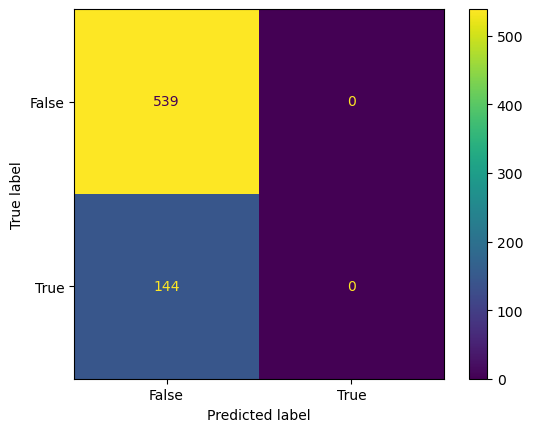

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
9
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


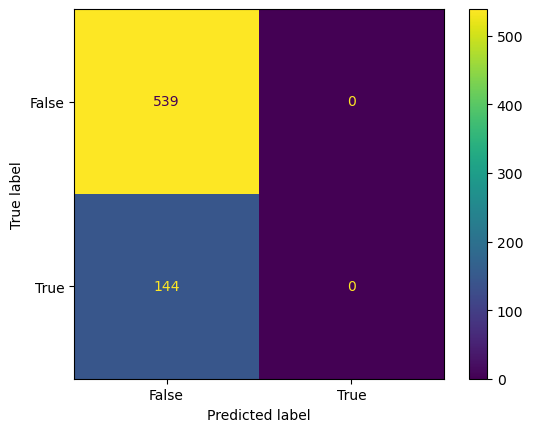

LogisticRegression
10
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


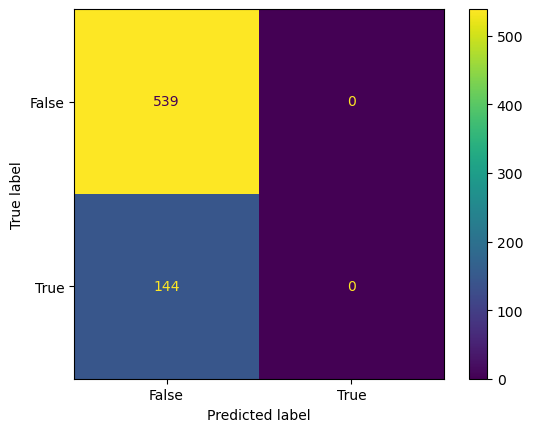

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
1
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


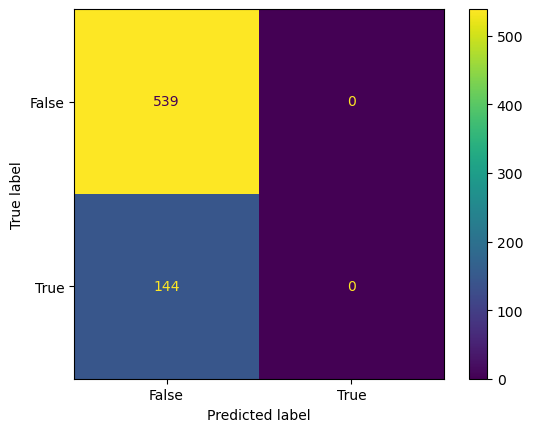

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
2
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


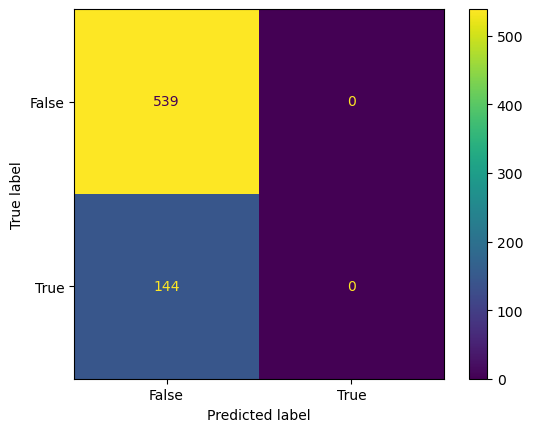

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
3
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


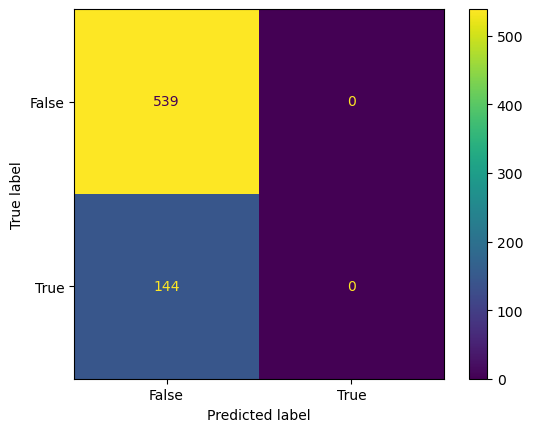

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
4
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


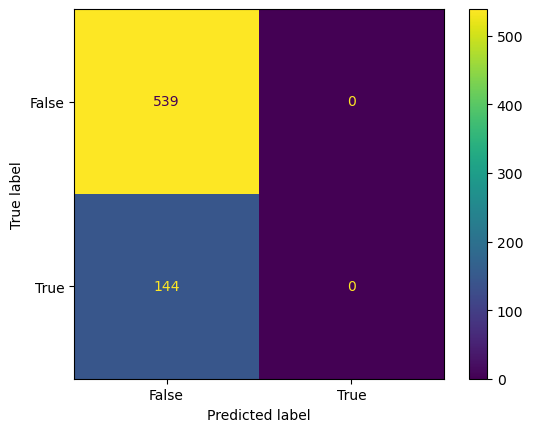

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
5
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


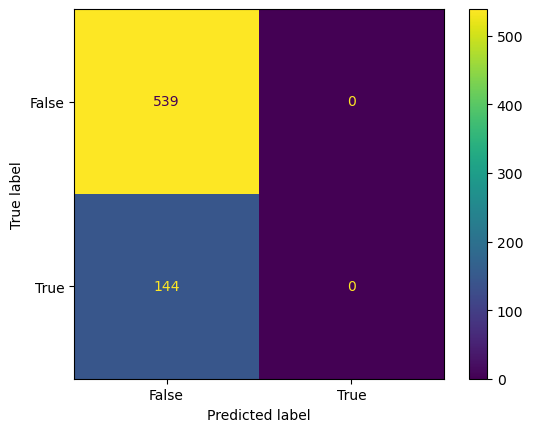

GaussianNB
6
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


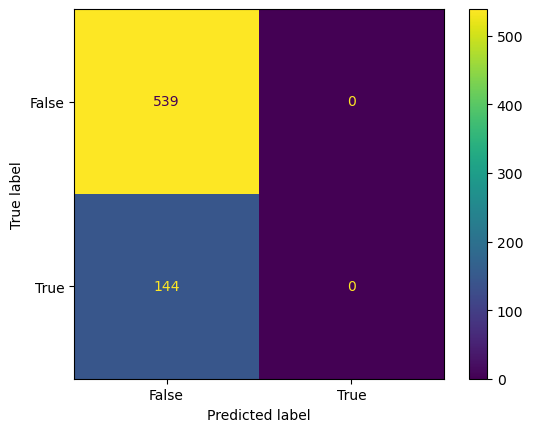

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
7
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


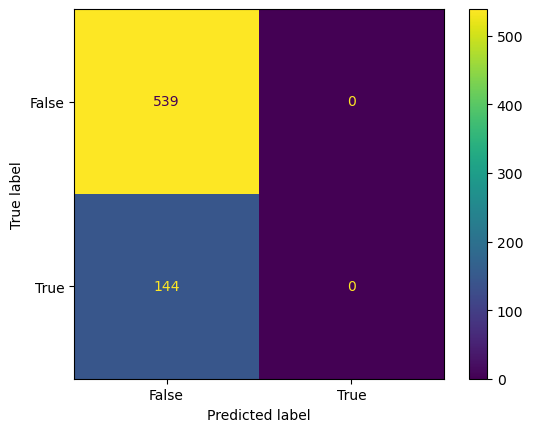

GaussianNB
8
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


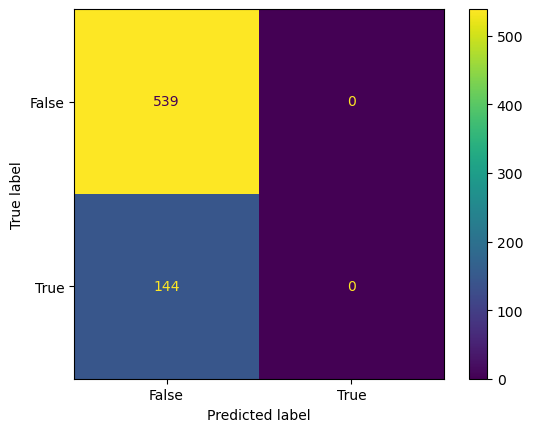

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
9
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


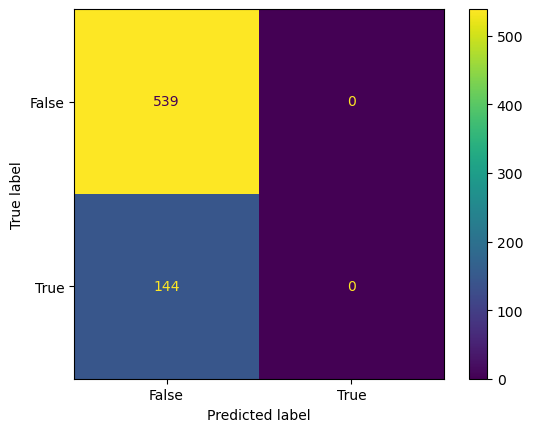

GaussianNB
10
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


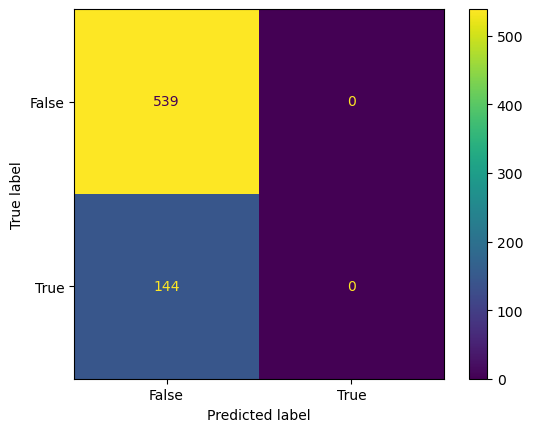

DecisionTreeClassifier
1
Accuracy: 0.7730600292825769
Precision: 0.07692307692307693
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9777365491651205
F1-Score: 0.012738853503184714


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


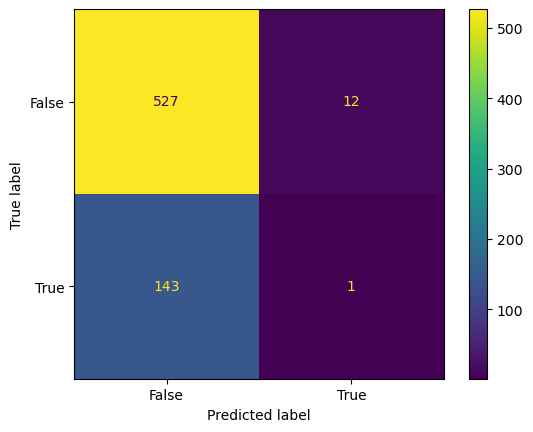

DecisionTreeClassifier
2
Accuracy: 0.6793557833089312
Precision: 0.2611464968152866
Recall (Sensitivity): 0.2847222222222222
Specificity: 0.7847866419294991
F1-Score: 0.2724252491694352


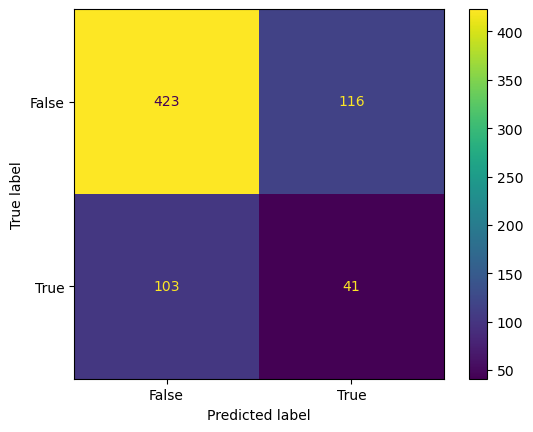

DecisionTreeClassifier
3
Accuracy: 0.6661786237188873
Precision: 0.2717391304347826
Recall (Sensitivity): 0.3472222222222222
Specificity: 0.75139146567718
F1-Score: 0.3048780487804878


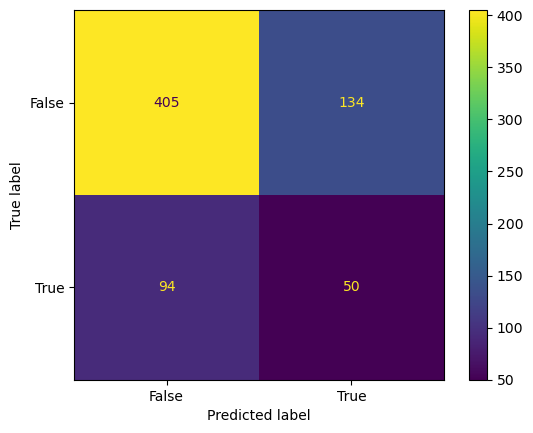

DecisionTreeClassifier
4
Accuracy: 0.6691068814055637
Precision: 0.25595238095238093
Recall (Sensitivity): 0.2986111111111111
Specificity: 0.7680890538033395
F1-Score: 0.2756410256410256


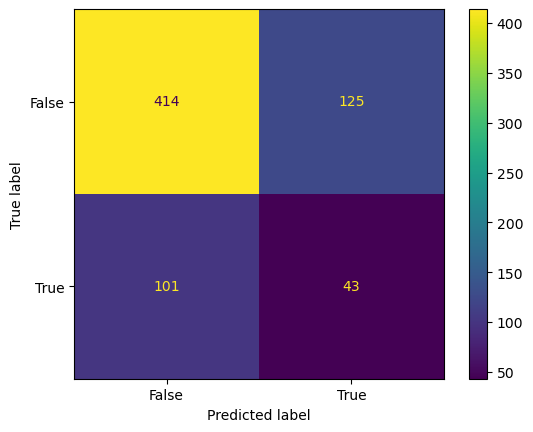

DecisionTreeClassifier
5
Accuracy: 0.6603221083455344
Precision: 0.25824175824175827
Recall (Sensitivity): 0.3263888888888889
Specificity: 0.7495361781076066
F1-Score: 0.2883435582822086


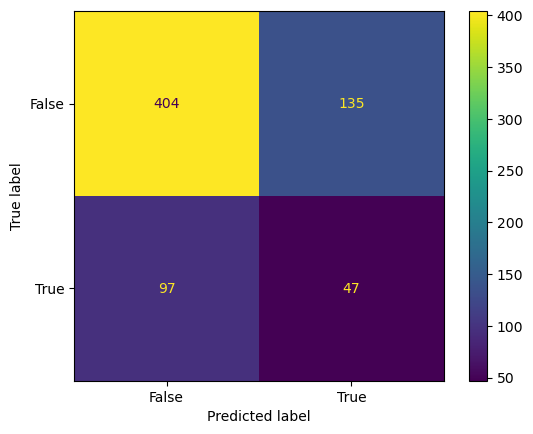

DecisionTreeClassifier
6
Accuracy: 0.6544655929721815
Precision: 0.24725274725274726
Recall (Sensitivity): 0.3125
Specificity: 0.7458256029684601
F1-Score: 0.27607361963190186


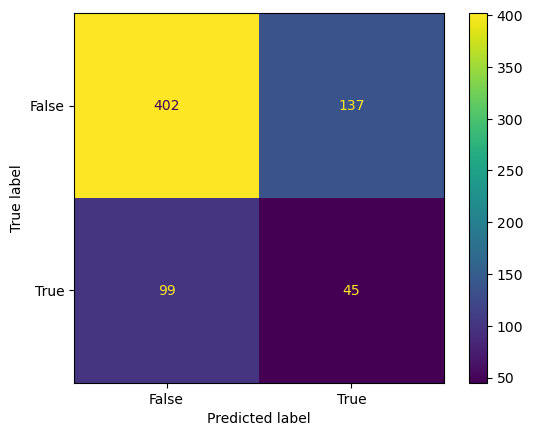

DecisionTreeClassifier
7
Accuracy: 0.6500732064421669
Precision: 0.23163841807909605
Recall (Sensitivity): 0.2847222222222222
Specificity: 0.7476808905380334
F1-Score: 0.2554517133956386


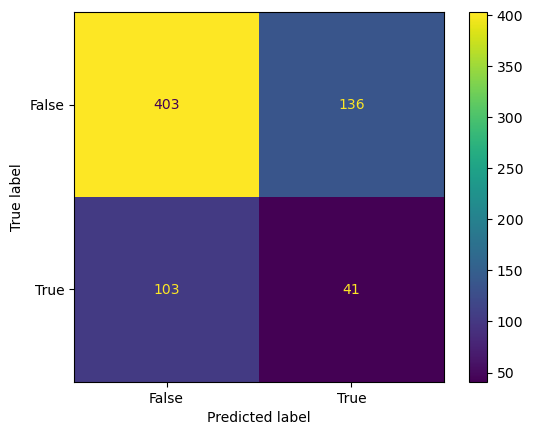

DecisionTreeClassifier
8
Accuracy: 0.6486090775988287
Precision: 0.25257731958762886
Recall (Sensitivity): 0.3402777777777778
Specificity: 0.7309833024118738
F1-Score: 0.28994082840236685


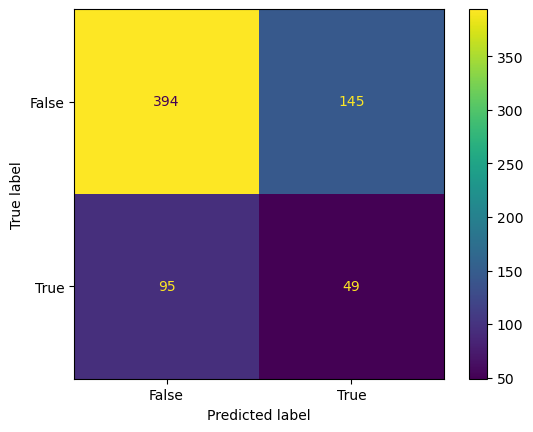

DecisionTreeClassifier
9
Accuracy: 0.6339677891654466
Precision: 0.22395833333333334
Recall (Sensitivity): 0.2986111111111111
Specificity: 0.7235621521335807
F1-Score: 0.255952380952381


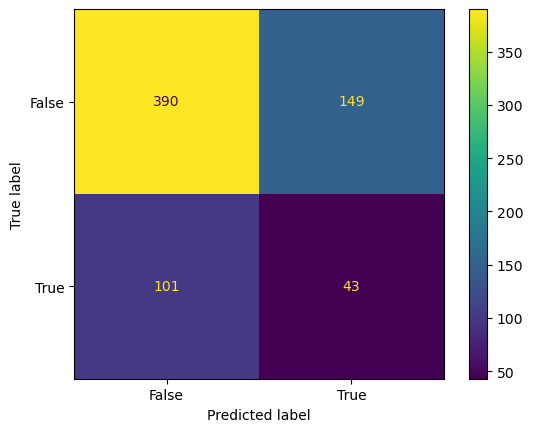

DecisionTreeClassifier
10
Accuracy: 0.6207906295754027
Precision: 0.21393034825870647
Recall (Sensitivity): 0.2986111111111111
Specificity: 0.7068645640074211
F1-Score: 0.24927536231884057


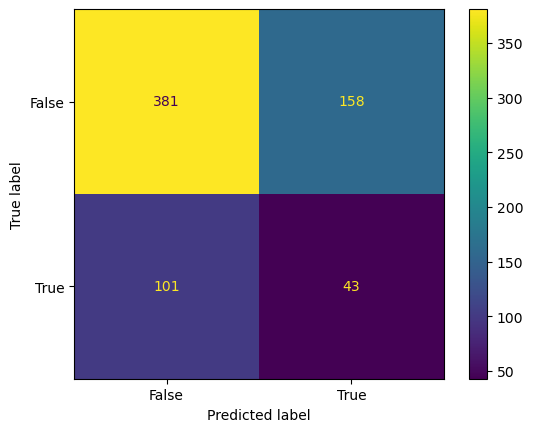

KNeighborsClassifier
1
Accuracy: 0.726207906295754
Precision: 0.22077922077922077
Recall (Sensitivity): 0.11805555555555555
Specificity: 0.8886827458256029
F1-Score: 0.15384615384615385


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


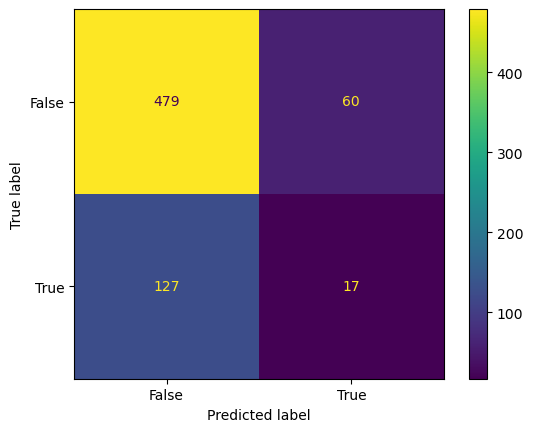

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
2
Accuracy: 0.746705710102489
Precision: 0.2698412698412698
Recall (Sensitivity): 0.11805555555555555
Specificity: 0.9146567717996289
F1-Score: 0.16425120772946858


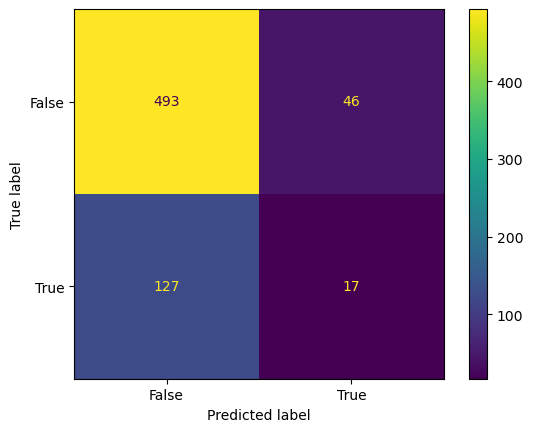

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
3
Accuracy: 0.7423133235724744
Precision: 0.2647058823529412
Recall (Sensitivity): 0.125
Specificity: 0.9072356215213359
F1-Score: 0.16981132075471697


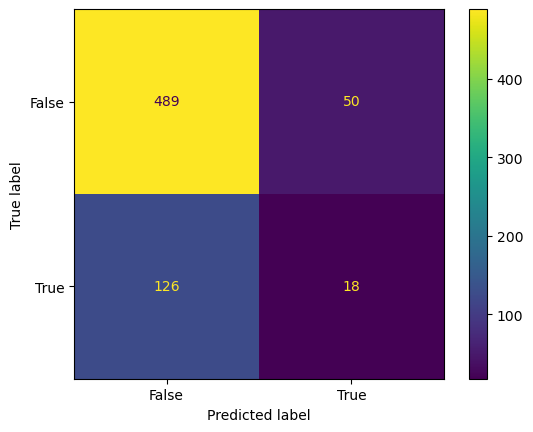

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
4
Accuracy: 0.7291361639824304
Precision: 0.2191780821917808
Recall (Sensitivity): 0.1111111111111111
Specificity: 0.8942486085343229
F1-Score: 0.14746543778801843


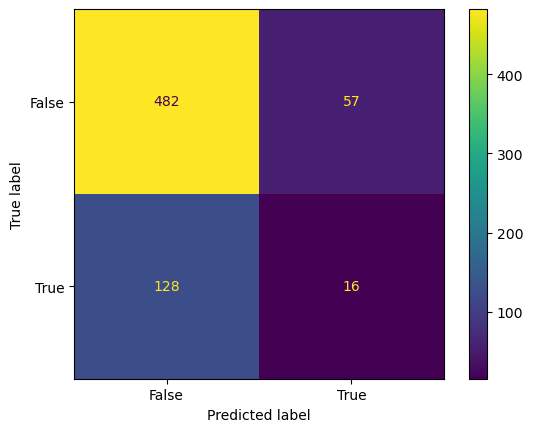

KNeighborsClassifier
5
Accuracy: 0.7364568081991215
Precision: 0.2
Recall (Sensitivity): 0.08333333333333333
Specificity: 0.9109461966604824
F1-Score: 0.11764705882352941


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


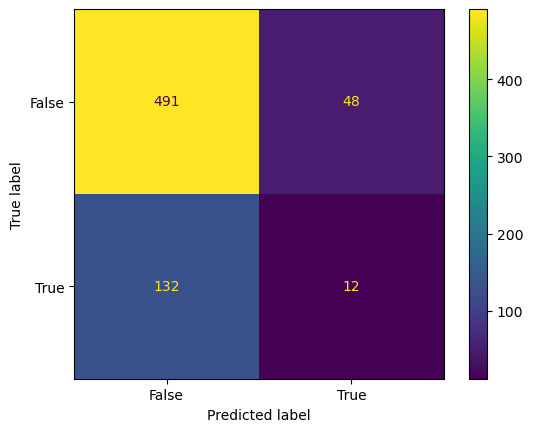

KNeighborsClassifier
6
Accuracy: 0.7496339677891655
Precision: 0.2631578947368421
Recall (Sensitivity): 0.10416666666666667
Specificity: 0.922077922077922
F1-Score: 0.14925373134328357


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


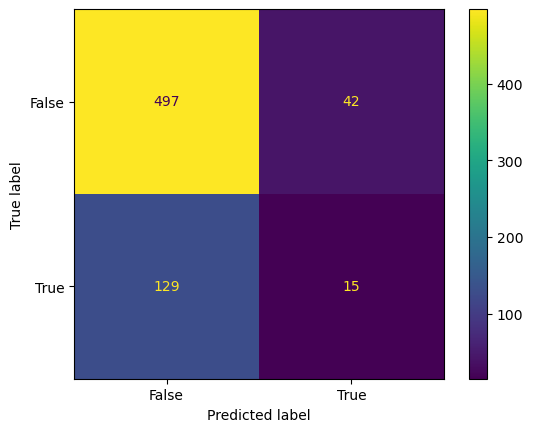

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
7
Accuracy: 0.7291361639824304
Precision: 0.2028985507246377
Recall (Sensitivity): 0.09722222222222222
Specificity: 0.8979591836734694
F1-Score: 0.13145539906103287


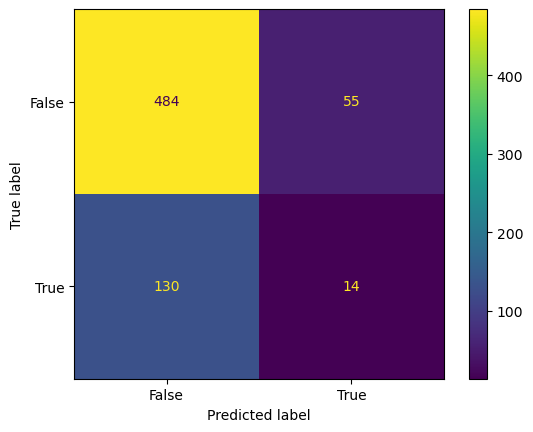

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
8
Accuracy: 0.7276720351390923
Precision: 0.18181818181818182
Recall (Sensitivity): 0.08333333333333333
Specificity: 0.8998144712430427
F1-Score: 0.1142857142857143


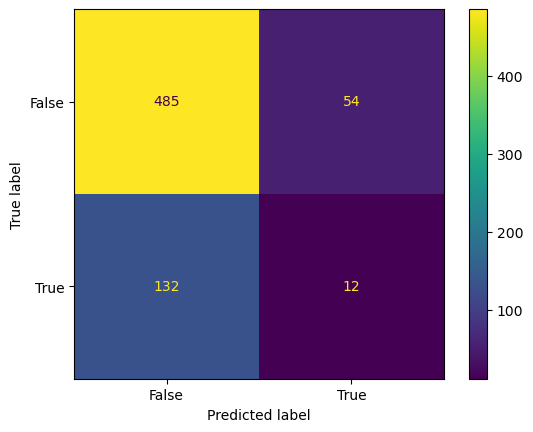

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
9
Accuracy: 0.7218155197657394
Precision: 0.17142857142857143
Recall (Sensitivity): 0.08333333333333333
Specificity: 0.8923933209647495
F1-Score: 0.11214953271028037


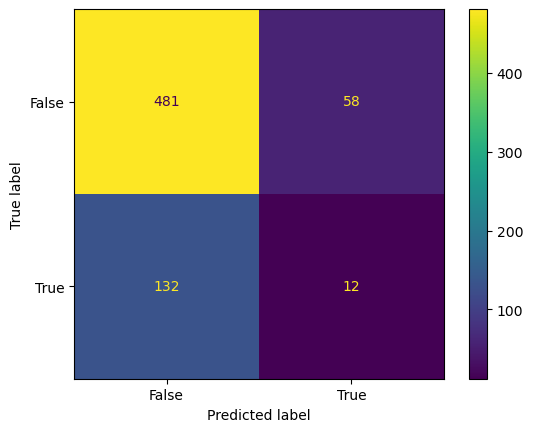

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
10
Accuracy: 0.718887262079063
Precision: 0.16666666666666666
Recall (Sensitivity): 0.08333333333333333
Specificity: 0.8886827458256029
F1-Score: 0.1111111111111111


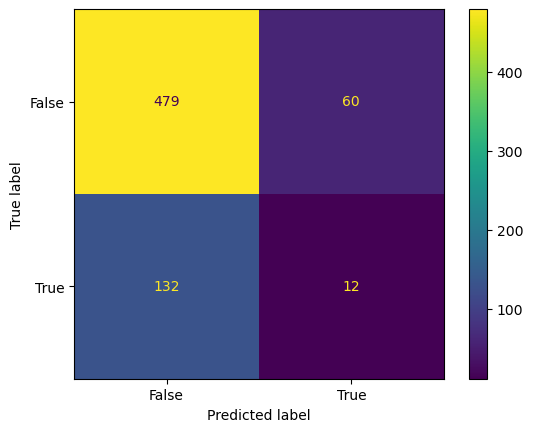

SVC
1
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


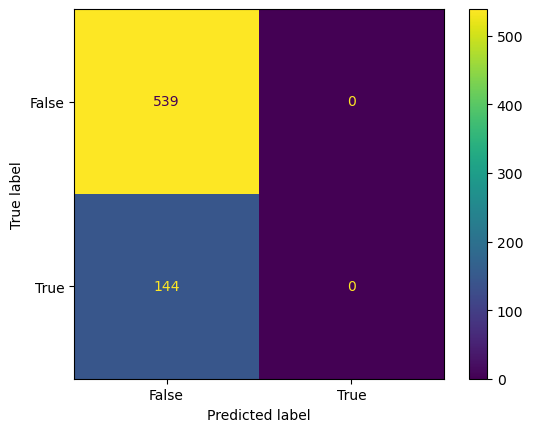

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
2
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


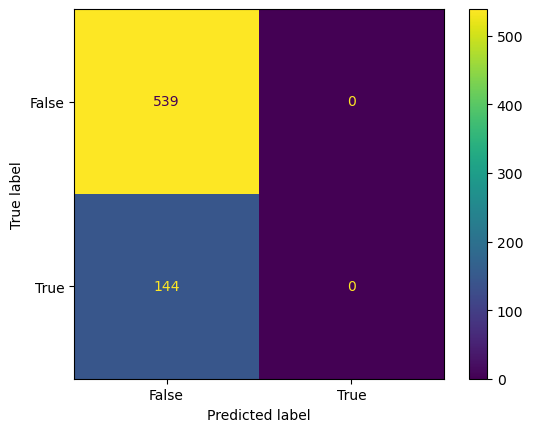

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
3
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


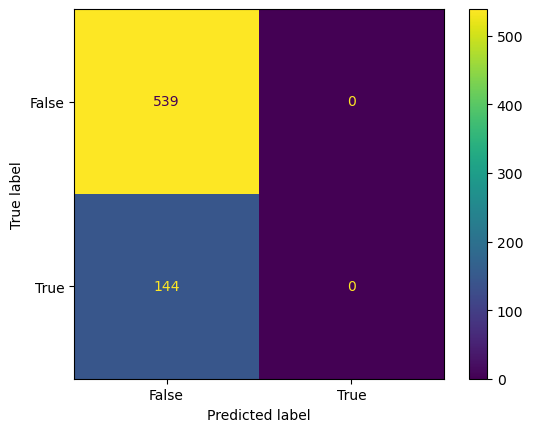

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
4
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


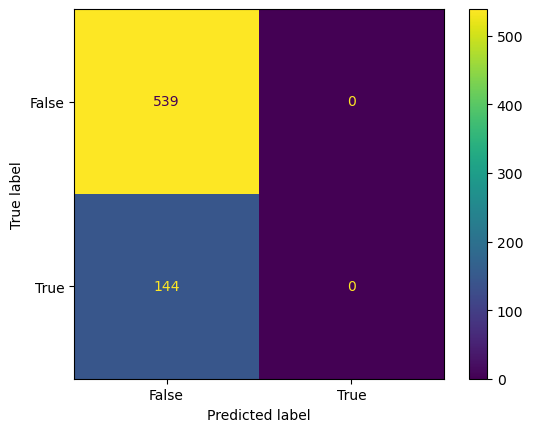

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
5
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


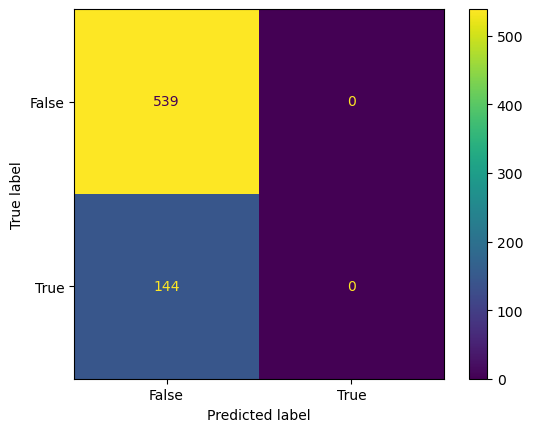

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
6
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


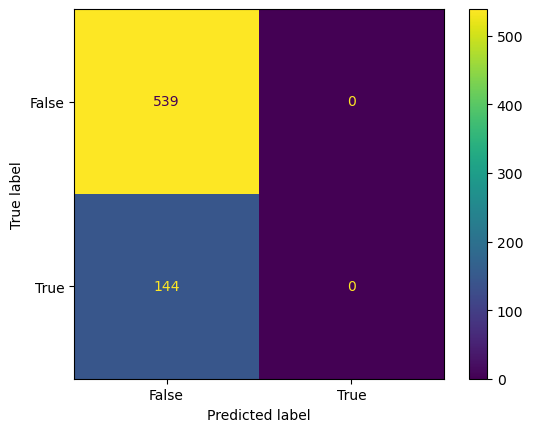

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
7
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


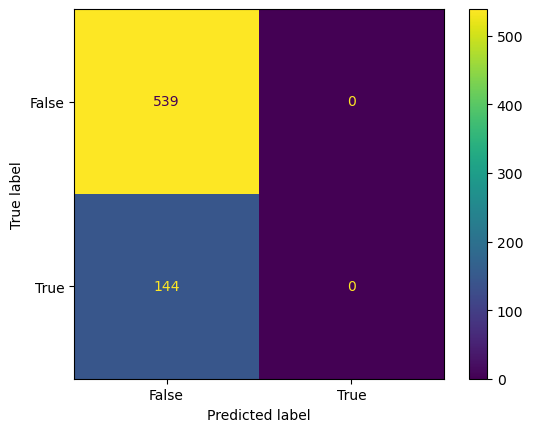

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
8
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


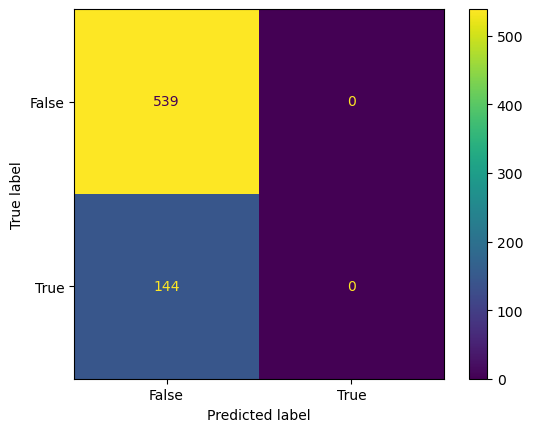

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
9
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


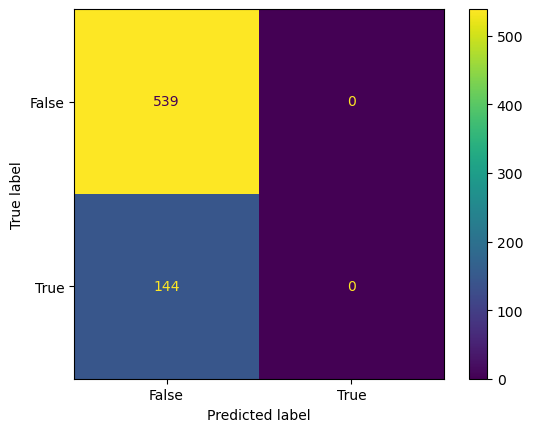

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
10
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


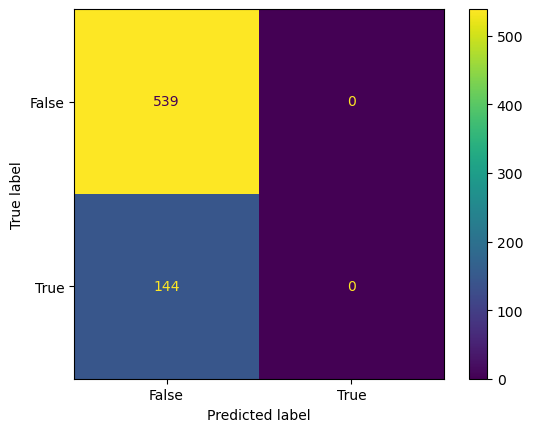

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier
1
Accuracy: 0.7730600292825769
Precision: 0.07692307692307693
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9777365491651205
F1-Score: 0.012738853503184714


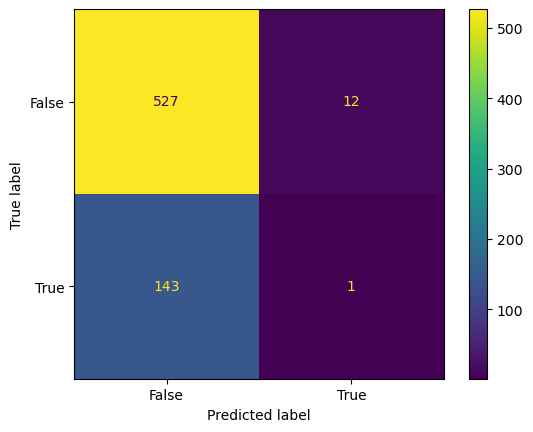

RandomForestClassifier
2
Accuracy: 0.7130307467057101
Precision: 0.2719298245614035
Recall (Sensitivity): 0.2152777777777778
Specificity: 0.8460111317254174
F1-Score: 0.24031007751937986


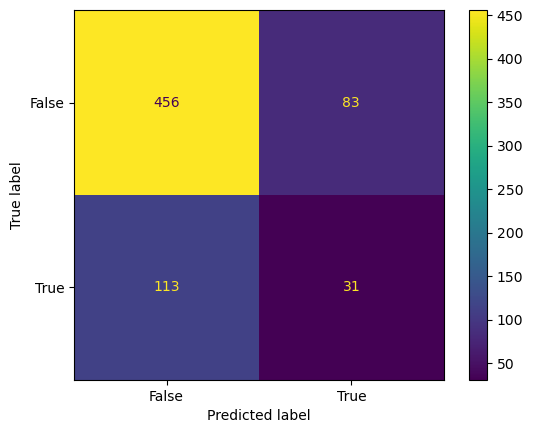

RandomForestClassifier
3
Accuracy: 0.7437774524158126
Precision: 0.3258426966292135
Recall (Sensitivity): 0.2013888888888889
Specificity: 0.8886827458256029
F1-Score: 0.24892703862660942


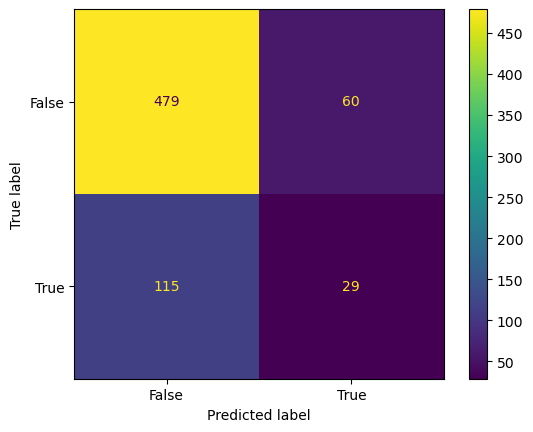

RandomForestClassifier
4
Accuracy: 0.7554904831625183
Precision: 0.23255813953488372
Recall (Sensitivity): 0.06944444444444445
Specificity: 0.9387755102040817
F1-Score: 0.10695187165775402


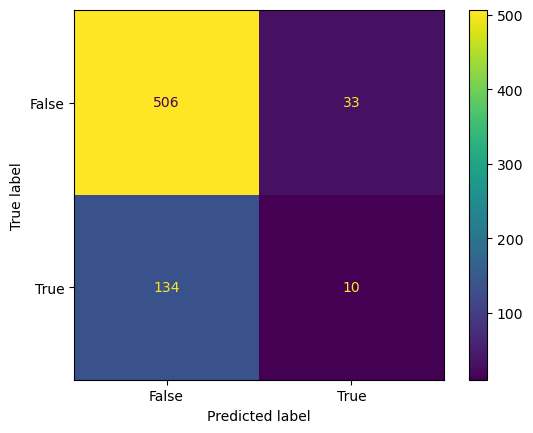

RandomForestClassifier
5
Accuracy: 0.7569546120058566
Precision: 0.19444444444444445
Recall (Sensitivity): 0.04861111111111111
Specificity: 0.9461966604823747
F1-Score: 0.07777777777777778


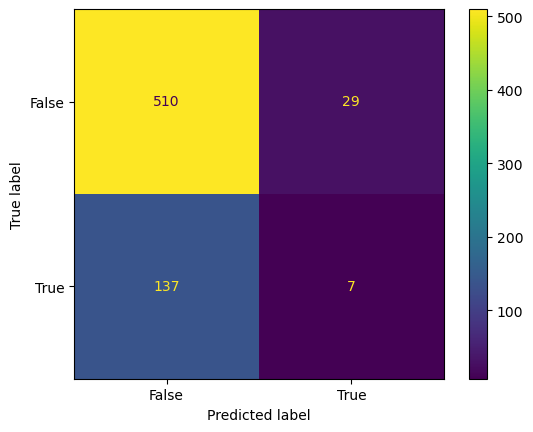

RandomForestClassifier
6
Accuracy: 0.7759882869692533
Precision: 0.32
Recall (Sensitivity): 0.05555555555555555
Specificity: 0.9684601113172542
F1-Score: 0.09467455621301776


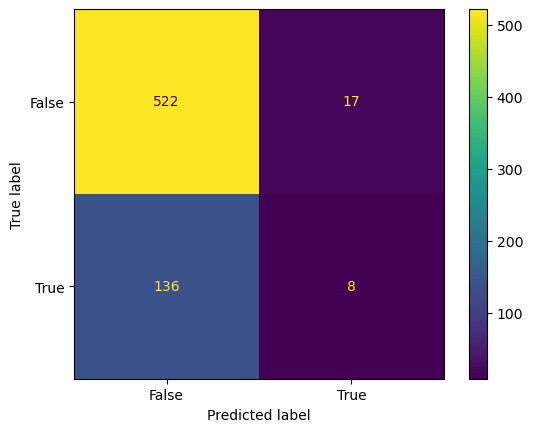

RandomForestClassifier
7
Accuracy: 0.7789165446559297
Precision: 0.3333333333333333
Recall (Sensitivity): 0.04861111111111111
Specificity: 0.974025974025974
F1-Score: 0.08484848484848485


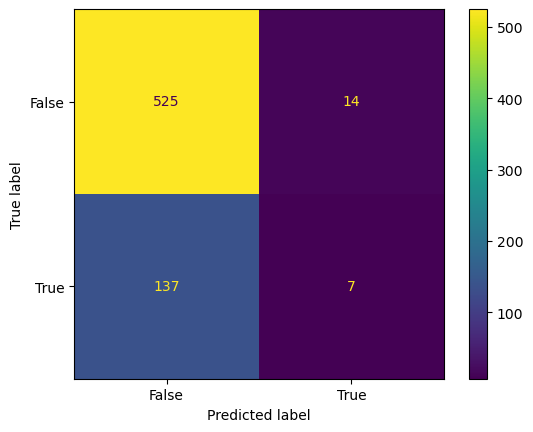

RandomForestClassifier
8
Accuracy: 0.7789165446559297
Precision: 0.3157894736842105
Recall (Sensitivity): 0.041666666666666664
Specificity: 0.9758812615955473
F1-Score: 0.07361963190184048


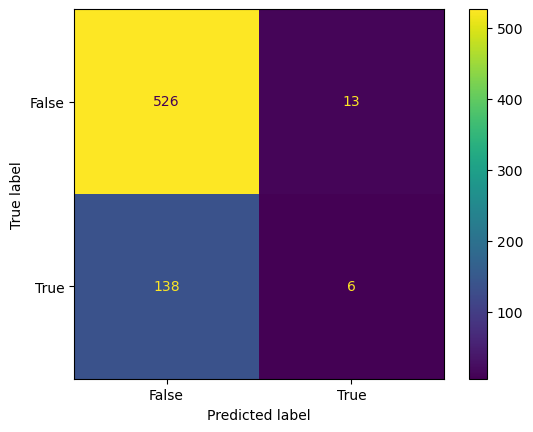

RandomForestClassifier
9
Accuracy: 0.7818448023426061
Precision: 0.4
Recall (Sensitivity): 0.06944444444444445
Specificity: 0.9721706864564007
F1-Score: 0.1183431952662722


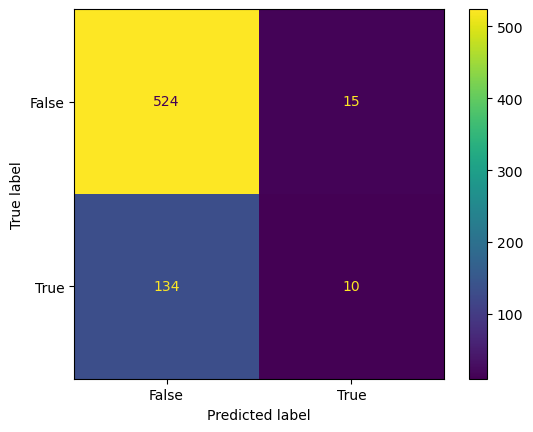

RandomForestClassifier
10
Accuracy: 0.7745241581259151
Precision: 0.3076923076923077
Recall (Sensitivity): 0.05555555555555555
Specificity: 0.9666048237476809
F1-Score: 0.09411764705882353


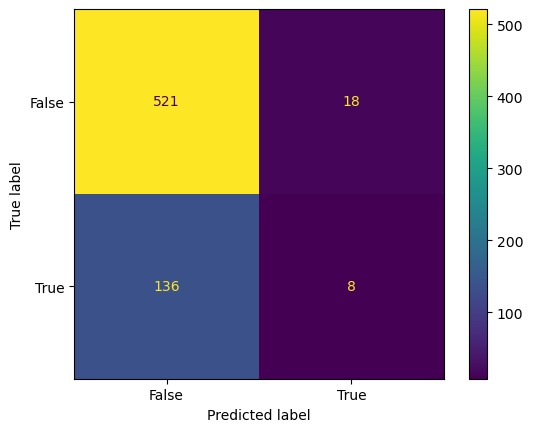

GradientBoostingClassifier
1
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


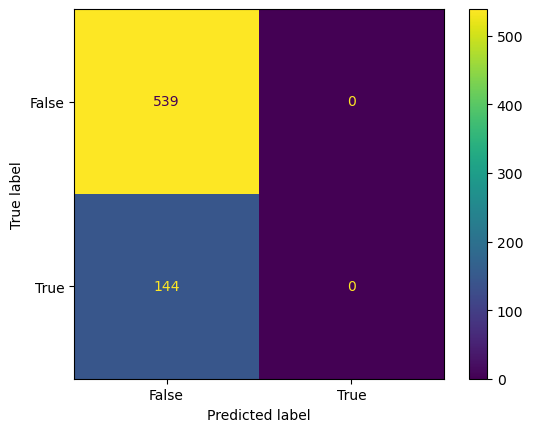

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier
2
Accuracy: 0.7818448023426061
Precision: 0.3333333333333333
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9814471243042672
F1-Score: 0.06289308176100629


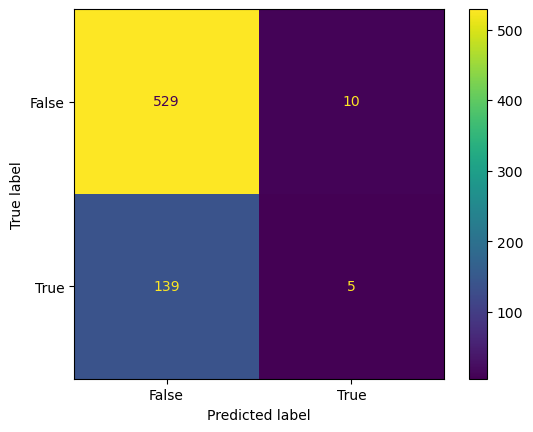

GradientBoostingClassifier
3
Accuracy: 0.7847730600292826
Precision: 0.36363636363636365
Recall (Sensitivity): 0.027777777777777776
Specificity: 0.987012987012987
F1-Score: 0.051612903225806445


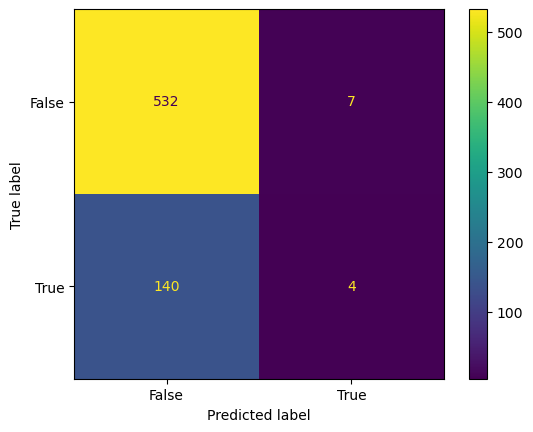

GradientBoostingClassifier
4
Accuracy: 0.7847730600292826
Precision: 0.38461538461538464
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9851576994434137
F1-Score: 0.06369426751592357


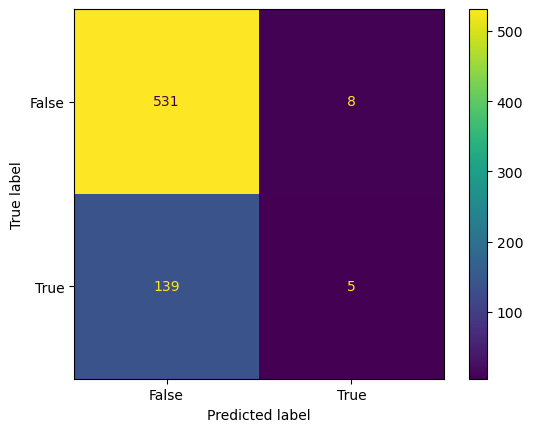

GradientBoostingClassifier
5
Accuracy: 0.7906295754026355
Precision: 0.5454545454545454
Recall (Sensitivity): 0.041666666666666664
Specificity: 0.9907235621521335
F1-Score: 0.07741935483870968


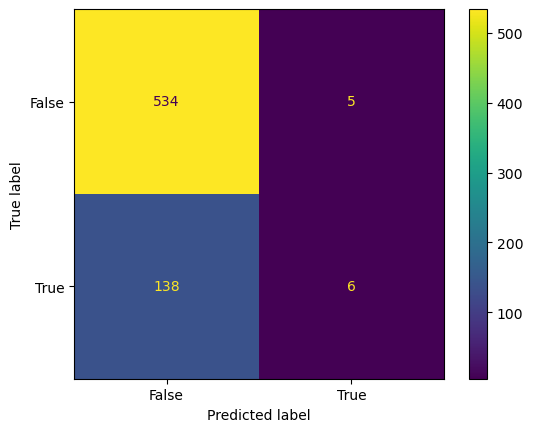

GradientBoostingClassifier
6
Accuracy: 0.7891654465592972
Precision: 0.5
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9907235621521335
F1-Score: 0.06493506493506494


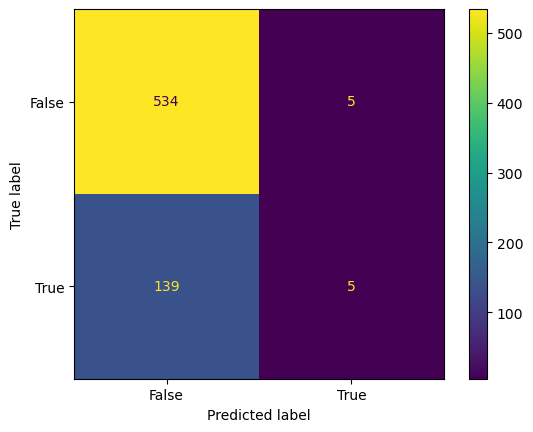

GradientBoostingClassifier
7
Accuracy: 0.787701317715959
Precision: 0.42857142857142855
Recall (Sensitivity): 0.020833333333333332
Specificity: 0.9925788497217068
F1-Score: 0.039735099337748346


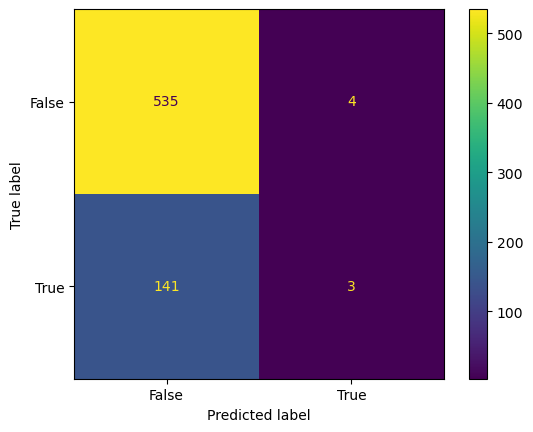

GradientBoostingClassifier
8
Accuracy: 0.787701317715959
Precision: 0.45454545454545453
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9888682745825603
F1-Score: 0.06451612903225808


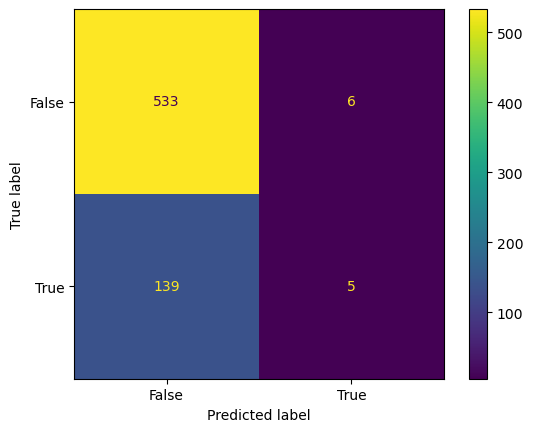

GradientBoostingClassifier
9
Accuracy: 0.7818448023426061
Precision: 0.2222222222222222
Recall (Sensitivity): 0.013888888888888888
Specificity: 0.987012987012987
F1-Score: 0.026143790849673203


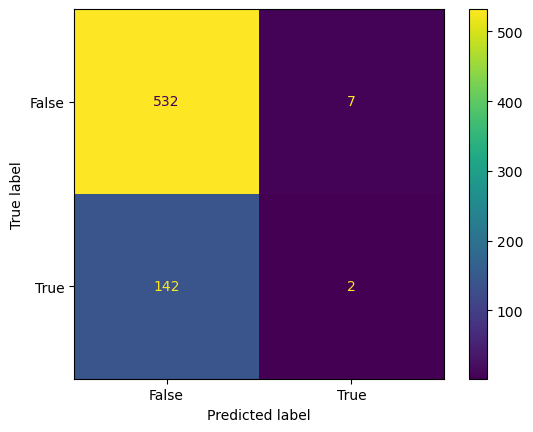

GradientBoostingClassifier
10
Accuracy: 0.7833089311859444
Precision: 0.3
Recall (Sensitivity): 0.020833333333333332
Specificity: 0.987012987012987
F1-Score: 0.03896103896103896


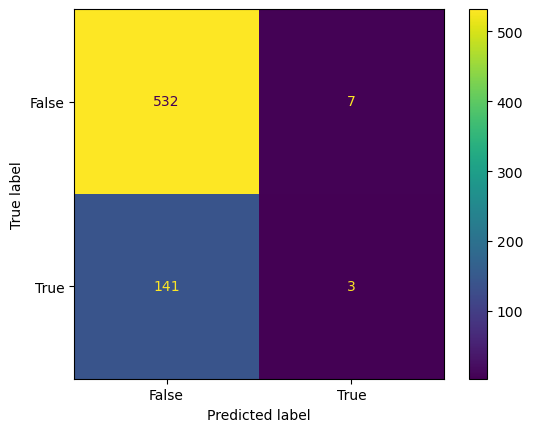

XGBClassifier
1
Accuracy: 0.7730600292825769
Precision: 0.07692307692307693
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9777365491651205
F1-Score: 0.012738853503184714


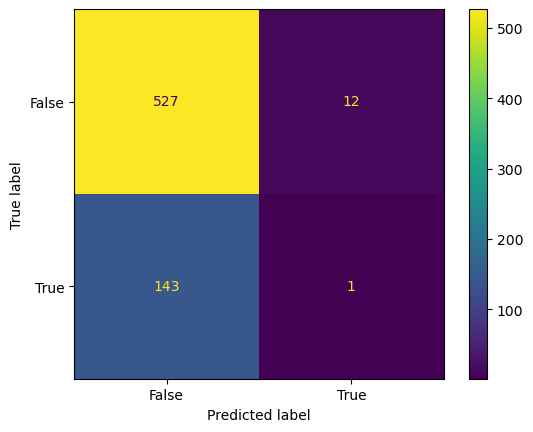

XGBClassifier
2
Accuracy: 0.7481698389458272
Precision: 0.32926829268292684
Recall (Sensitivity): 0.1875
Specificity: 0.8979591836734694
F1-Score: 0.2389380530973451


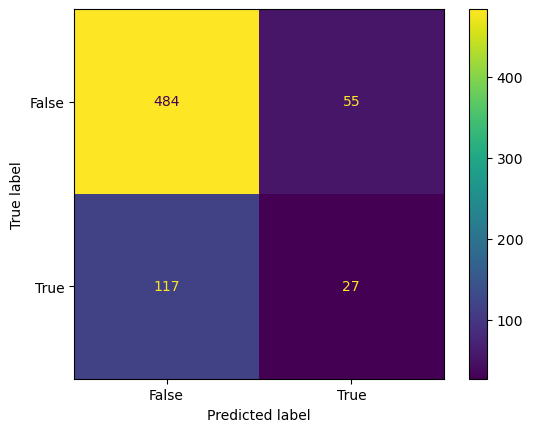

XGBClassifier
3
Accuracy: 0.7496339677891655
Precision: 0.3333333333333333
Recall (Sensitivity): 0.1875
Specificity: 0.8998144712430427
F1-Score: 0.24000000000000005


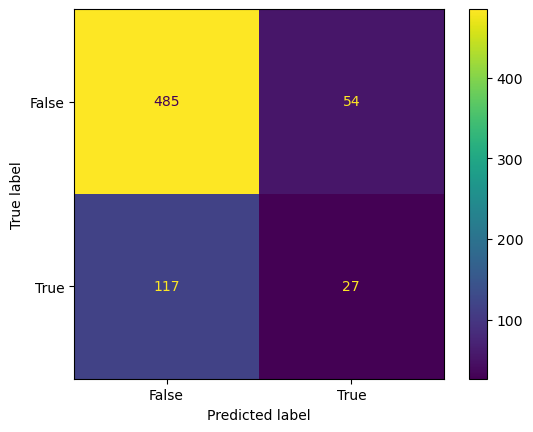

XGBClassifier
4
Accuracy: 0.718887262079063
Precision: 0.21428571428571427
Recall (Sensitivity): 0.125
Specificity: 0.8775510204081632
F1-Score: 0.15789473684210525


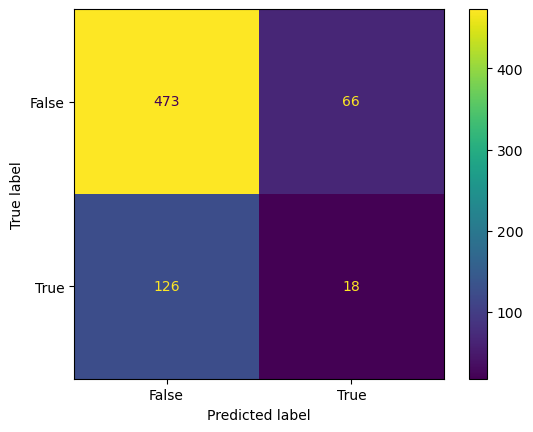

XGBClassifier
5
Accuracy: 0.7291361639824304
Precision: 0.24691358024691357
Recall (Sensitivity): 0.1388888888888889
Specificity: 0.8868274582560297
F1-Score: 0.17777777777777778


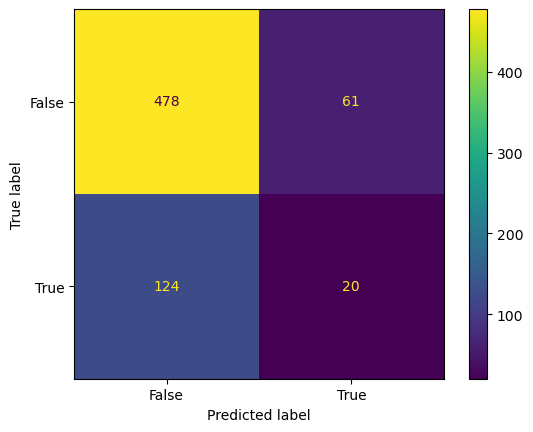

XGBClassifier
6
Accuracy: 0.7159590043923866
Precision: 0.1951219512195122
Recall (Sensitivity): 0.1111111111111111
Specificity: 0.8775510204081632
F1-Score: 0.1415929203539823


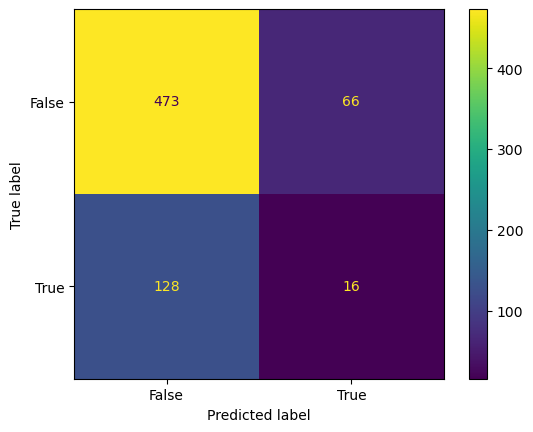

XGBClassifier
7
Accuracy: 0.7291361639824304
Precision: 0.2191780821917808
Recall (Sensitivity): 0.1111111111111111
Specificity: 0.8942486085343229
F1-Score: 0.14746543778801843


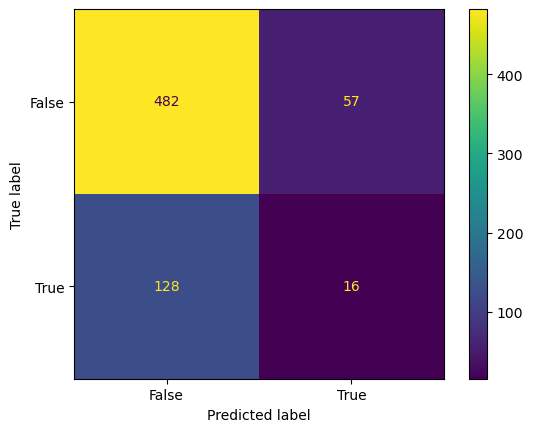

XGBClassifier
8
Accuracy: 0.7174231332357247
Precision: 0.19753086419753085
Recall (Sensitivity): 0.1111111111111111
Specificity: 0.8794063079777366
F1-Score: 0.14222222222222222


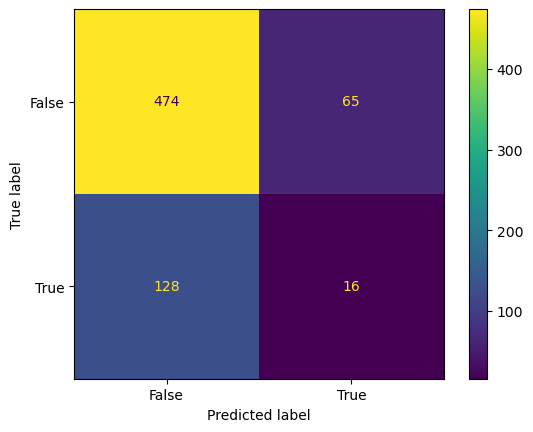

XGBClassifier
9
Accuracy: 0.739385065885798
Precision: 0.25
Recall (Sensitivity): 0.11805555555555555
Specificity: 0.9053803339517625
F1-Score: 0.16037735849056603


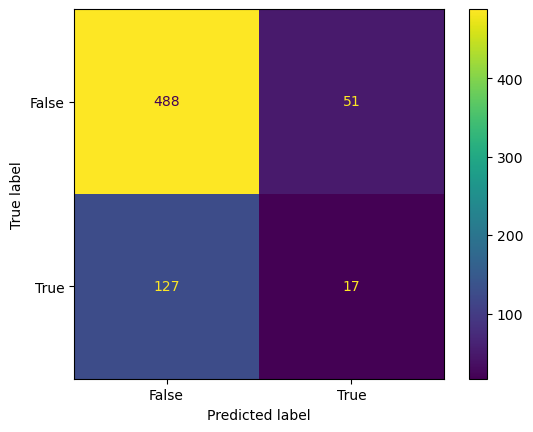

XGBClassifier
10
Accuracy: 0.7408491947291361
Precision: 0.2608695652173913
Recall (Sensitivity): 0.125
Specificity: 0.9053803339517625
F1-Score: 0.16901408450704225


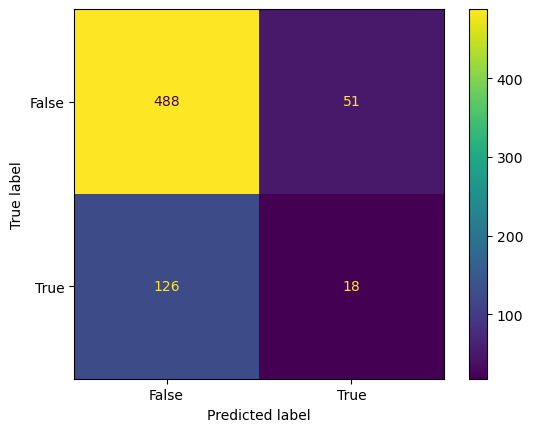

LogisticRegression
1
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


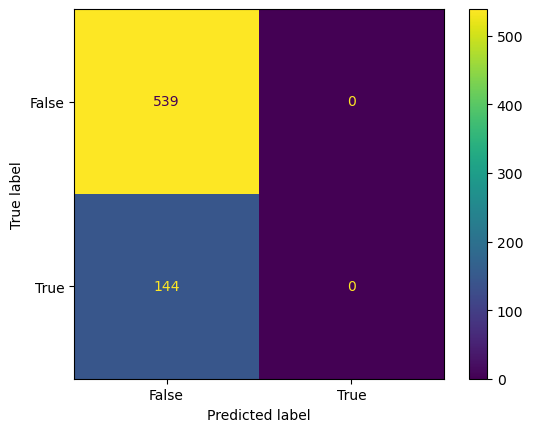

LogisticRegression
2
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


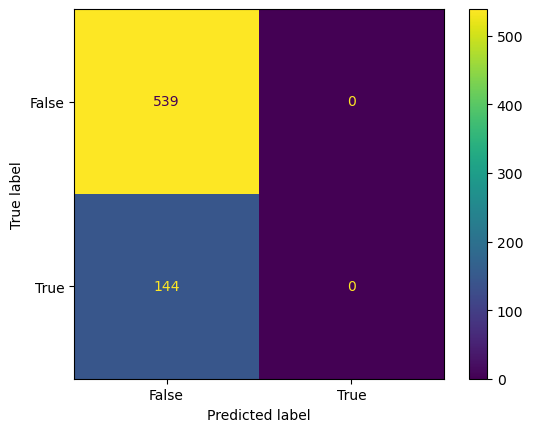

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
3
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


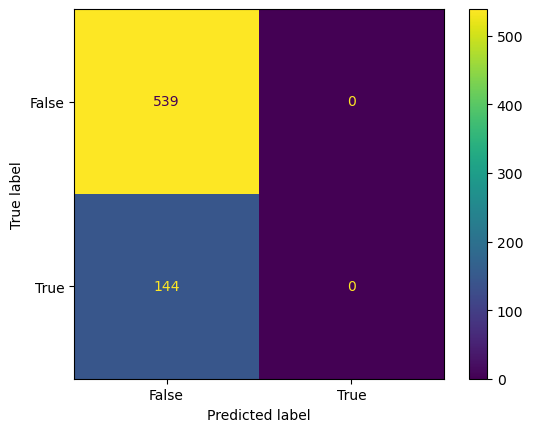

LogisticRegression
4
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


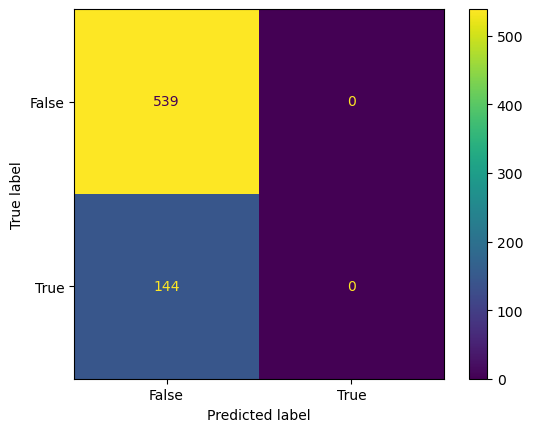

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
5
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


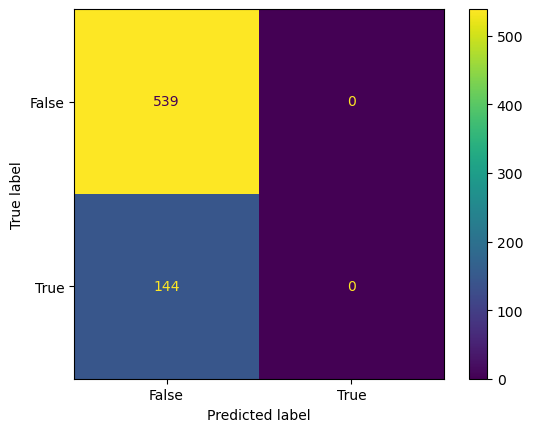

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
6
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


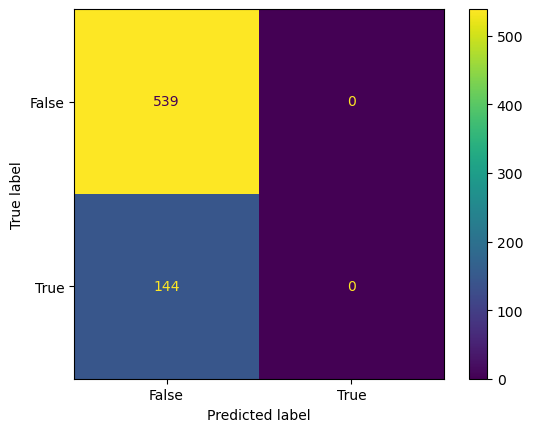

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
7
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


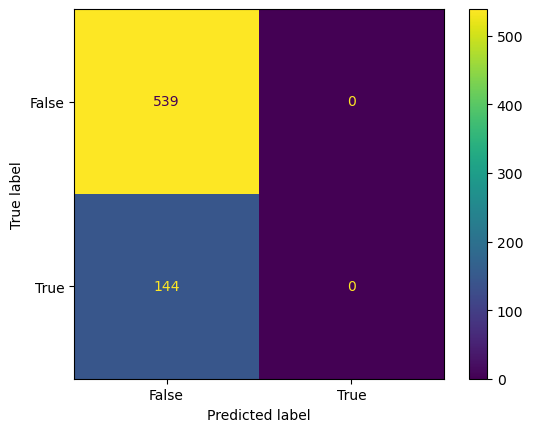

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
8
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


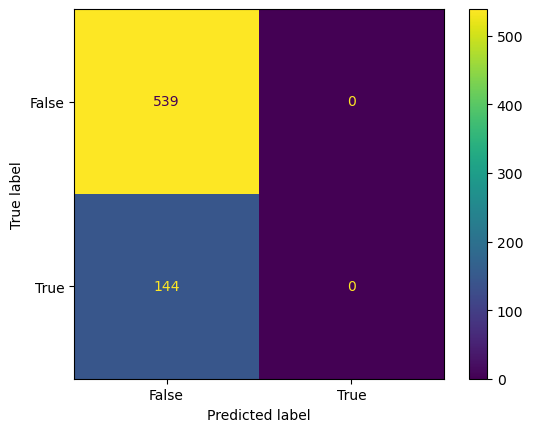

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
9
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


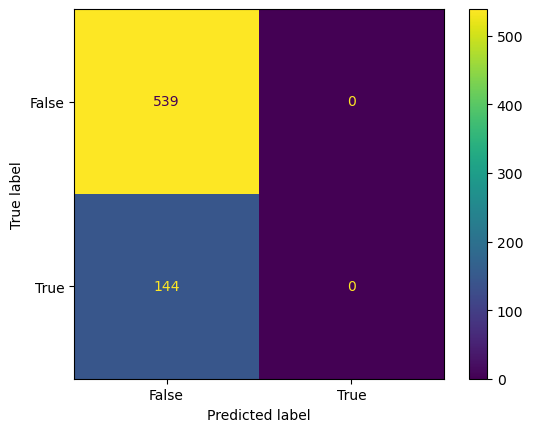

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
10
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


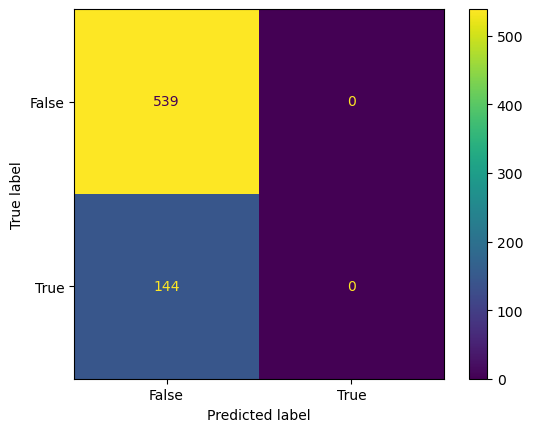

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
1
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


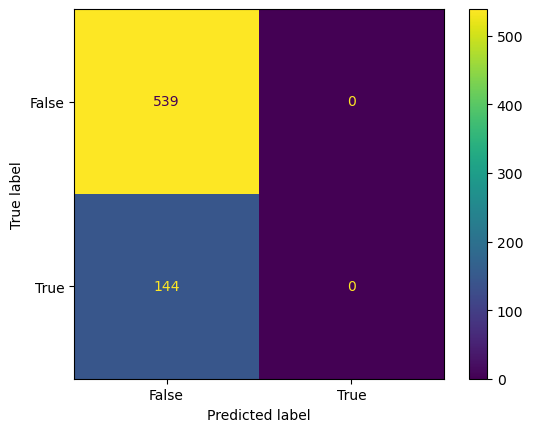

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
2
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


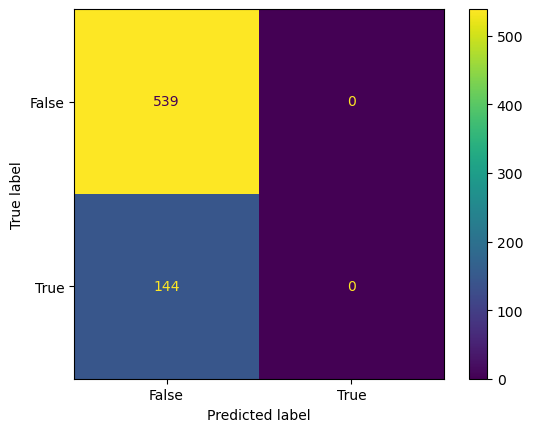

GaussianNB
3
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


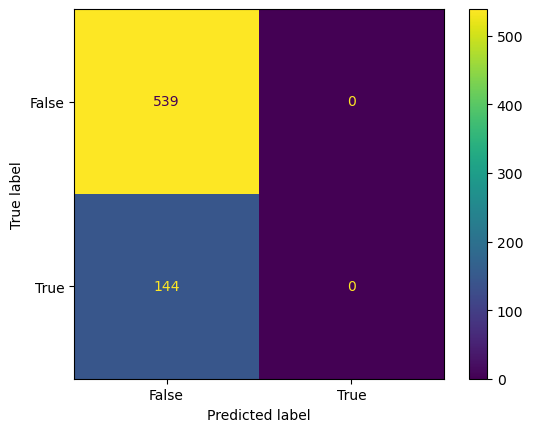

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
4
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


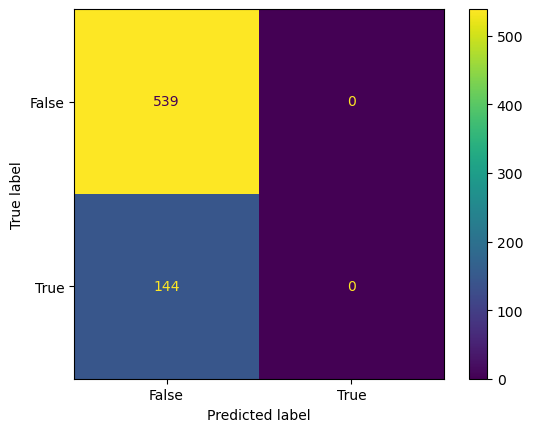

GaussianNB
5
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


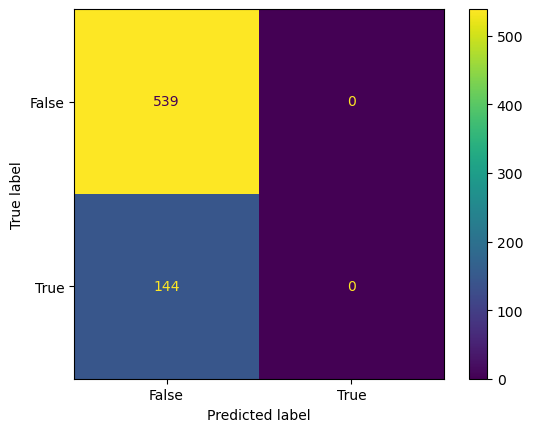

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
6
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


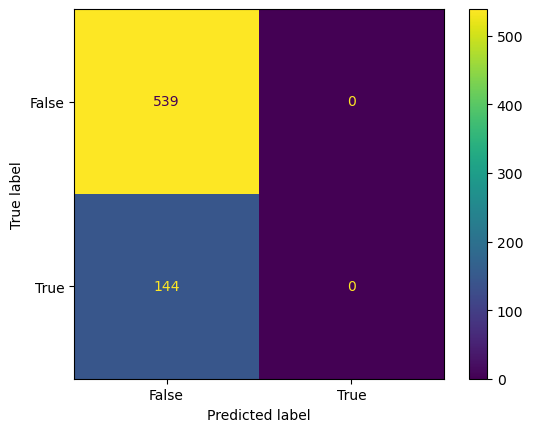

GaussianNB
7
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


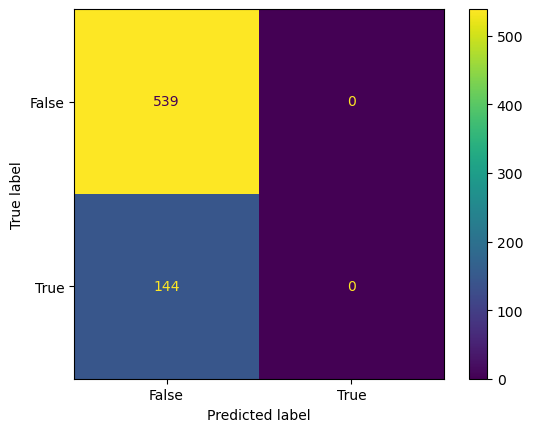

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
8
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


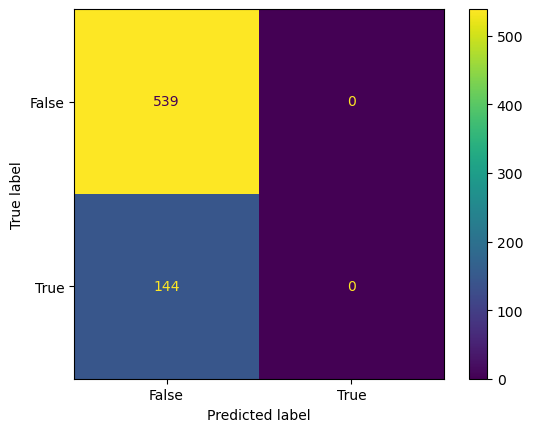

GaussianNB
9
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


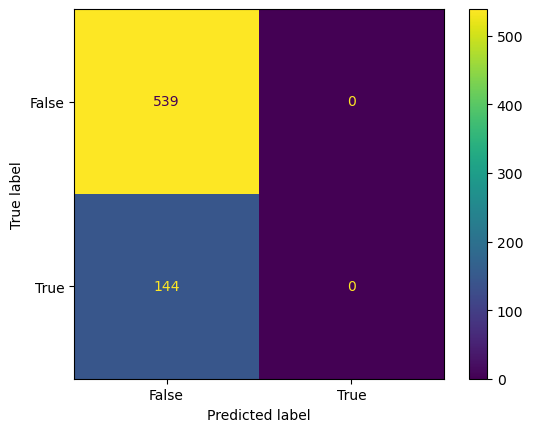

GaussianNB
10
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


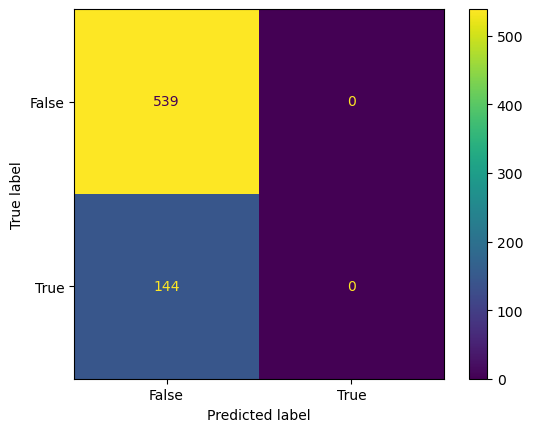

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier
1
Accuracy: 0.7730600292825769
Precision: 0.07692307692307693
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9777365491651205
F1-Score: 0.012738853503184714


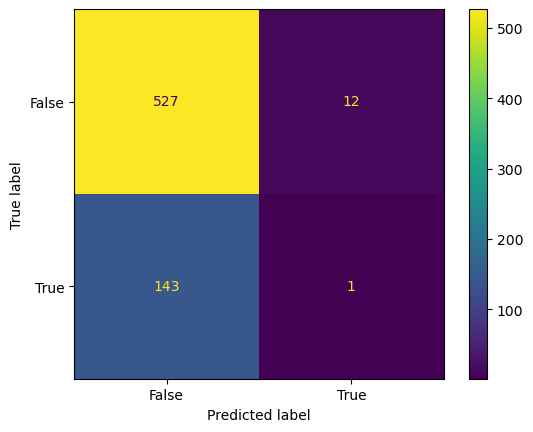

DecisionTreeClassifier
2
Accuracy: 0.6793557833089312
Precision: 0.2611464968152866
Recall (Sensitivity): 0.2847222222222222
Specificity: 0.7847866419294991
F1-Score: 0.2724252491694352


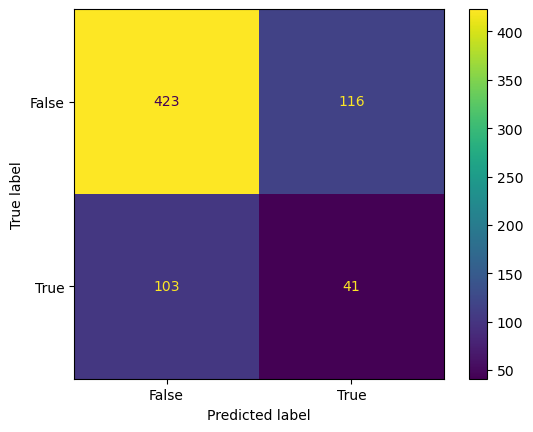

DecisionTreeClassifier
3
Accuracy: 0.6544655929721815
Precision: 0.22941176470588234
Recall (Sensitivity): 0.2708333333333333
Specificity: 0.7569573283858998
F1-Score: 0.24840764331210188


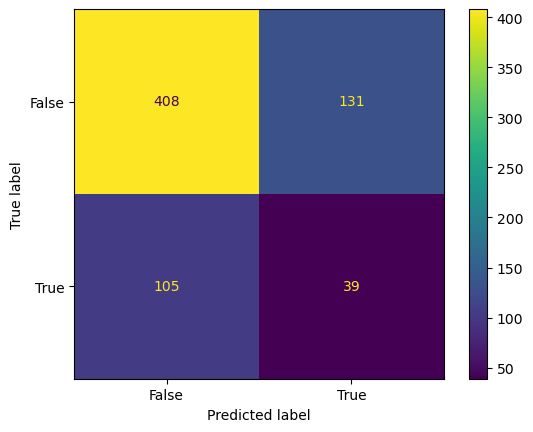

DecisionTreeClassifier
4
Accuracy: 0.6691068814055637
Precision: 0.25595238095238093
Recall (Sensitivity): 0.2986111111111111
Specificity: 0.7680890538033395
F1-Score: 0.2756410256410256


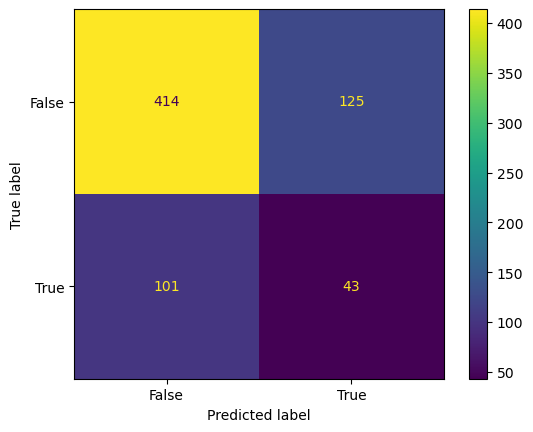

DecisionTreeClassifier
5
Accuracy: 0.6705710102489019
Precision: 0.2658959537572254
Recall (Sensitivity): 0.3194444444444444
Specificity: 0.764378478664193
F1-Score: 0.2902208201892744


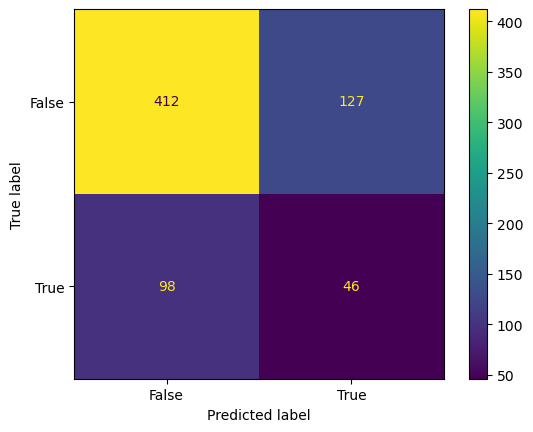

DecisionTreeClassifier
6
Accuracy: 0.6427525622254758
Precision: 0.20588235294117646
Recall (Sensitivity): 0.24305555555555555
Specificity: 0.7495361781076066
F1-Score: 0.2229299363057325


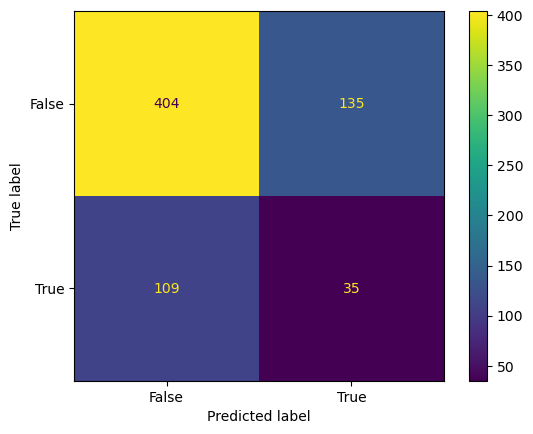

DecisionTreeClassifier
7
Accuracy: 0.6339677891654466
Precision: 0.2268041237113402
Recall (Sensitivity): 0.3055555555555556
Specificity: 0.7217068645640075
F1-Score: 0.2603550295857988


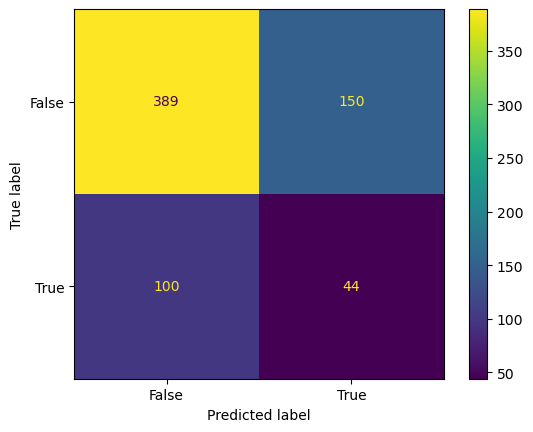

DecisionTreeClassifier
8
Accuracy: 0.6500732064421669
Precision: 0.24324324324324326
Recall (Sensitivity): 0.3125
Specificity: 0.7402597402597403
F1-Score: 0.27355623100303955


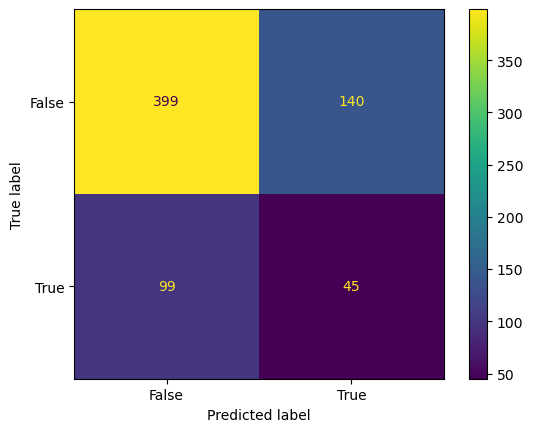

DecisionTreeClassifier
9
Accuracy: 0.6442166910688141
Precision: 0.24873096446700507
Recall (Sensitivity): 0.3402777777777778
Specificity: 0.725417439703154
F1-Score: 0.2873900293255132


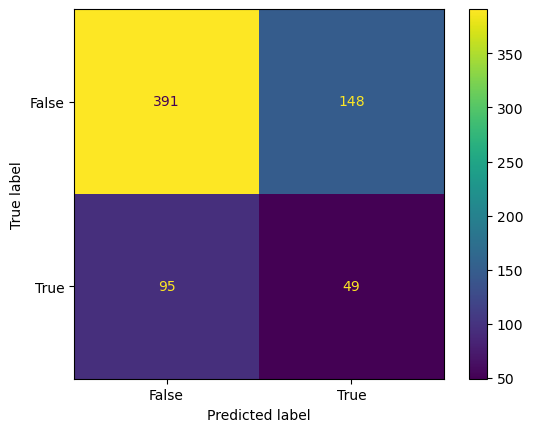

DecisionTreeClassifier
10
Accuracy: 0.6266471449487555
Precision: 0.22110552763819097
Recall (Sensitivity): 0.3055555555555556
Specificity: 0.712430426716141
F1-Score: 0.2565597667638484


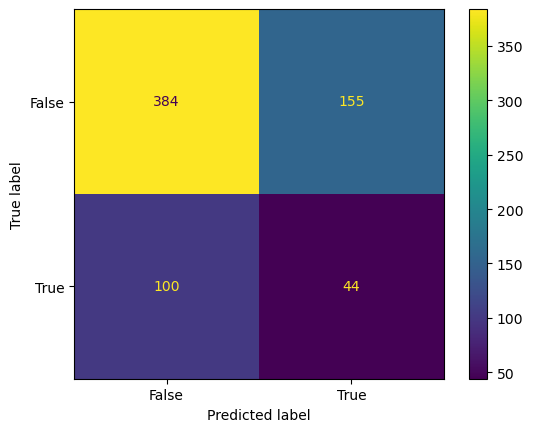

KNeighborsClassifier
1
Accuracy: 0.726207906295754
Precision: 0.22077922077922077
Recall (Sensitivity): 0.11805555555555555
Specificity: 0.8886827458256029
F1-Score: 0.15384615384615385


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


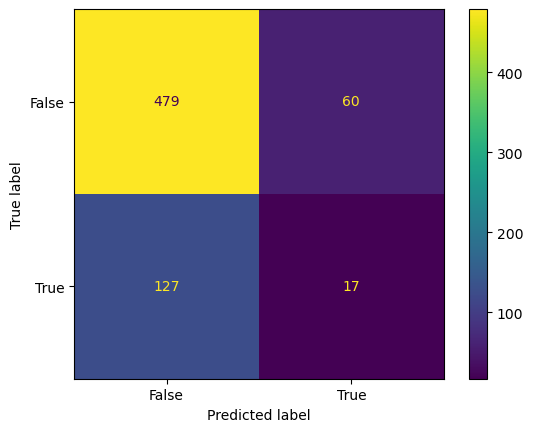

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
2
Accuracy: 0.746705710102489
Precision: 0.2698412698412698
Recall (Sensitivity): 0.11805555555555555
Specificity: 0.9146567717996289
F1-Score: 0.16425120772946858


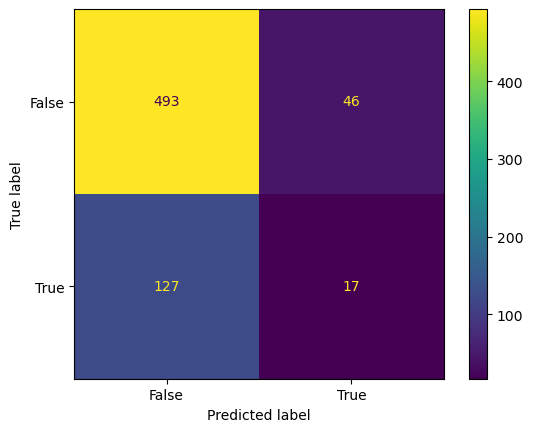

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
3
Accuracy: 0.698389458272328
Precision: 0.09210526315789473
Recall (Sensitivity): 0.04861111111111111
Specificity: 0.8719851576994434
F1-Score: 0.06363636363636363


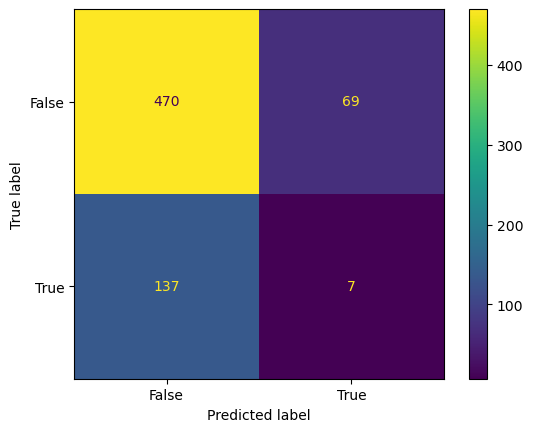

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
4
Accuracy: 0.7291361639824304
Precision: 0.2191780821917808
Recall (Sensitivity): 0.1111111111111111
Specificity: 0.8942486085343229
F1-Score: 0.14746543778801843


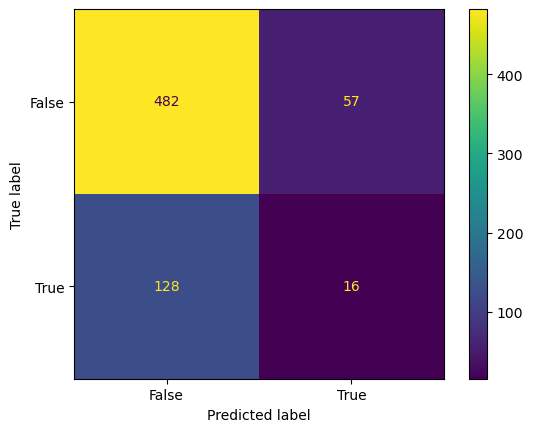

KNeighborsClassifier
5
Accuracy: 0.7335285505124451
Precision: 0.2564102564102564
Recall (Sensitivity): 0.1388888888888889
Specificity: 0.8923933209647495
F1-Score: 0.1801801801801802


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


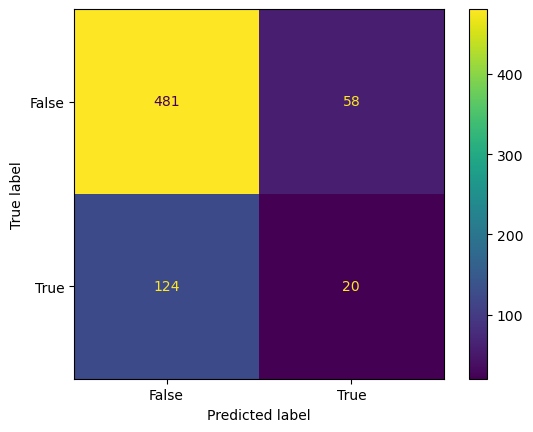

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
6
Accuracy: 0.7218155197657394
Precision: 0.19736842105263158
Recall (Sensitivity): 0.10416666666666667
Specificity: 0.8868274582560297
F1-Score: 0.13636363636363635


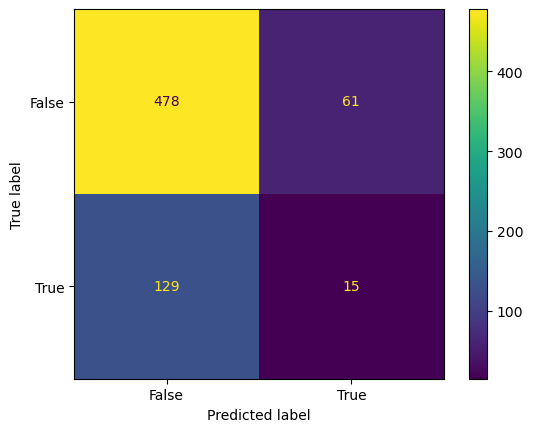

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
7
Accuracy: 0.7174231332357247
Precision: 0.2247191011235955
Recall (Sensitivity): 0.1388888888888889
Specificity: 0.8719851576994434
F1-Score: 0.17167381974248927


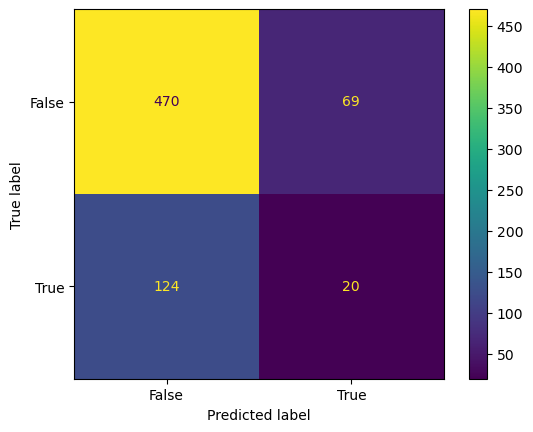

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
8
Accuracy: 0.7130307467057101
Precision: 0.19047619047619047
Recall (Sensitivity): 0.1111111111111111
Specificity: 0.8738404452690167
F1-Score: 0.14035087719298245


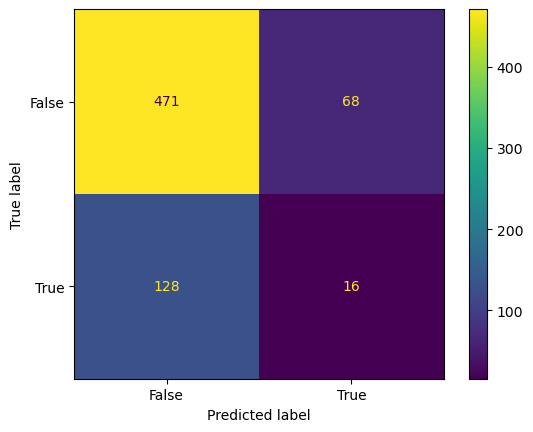

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
9
Accuracy: 0.7174231332357247
Precision: 0.18181818181818182
Recall (Sensitivity): 0.09722222222222222
Specificity: 0.8831168831168831
F1-Score: 0.12669683257918551


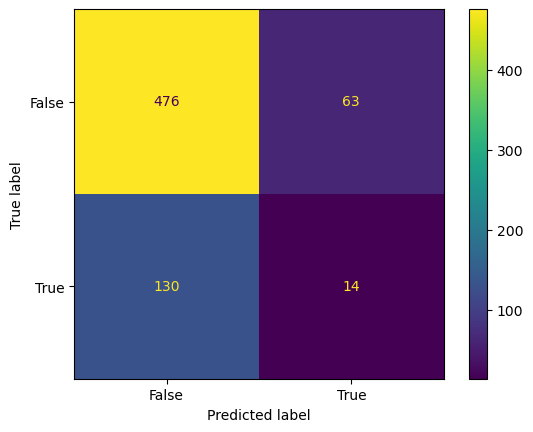

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
10
Accuracy: 0.718887262079063
Precision: 0.16666666666666666
Recall (Sensitivity): 0.08333333333333333
Specificity: 0.8886827458256029
F1-Score: 0.1111111111111111


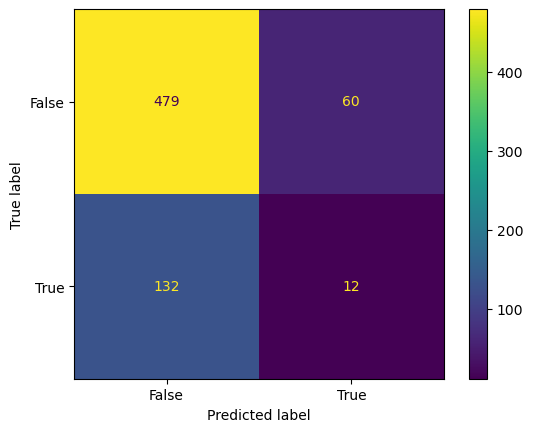

SVC
1
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


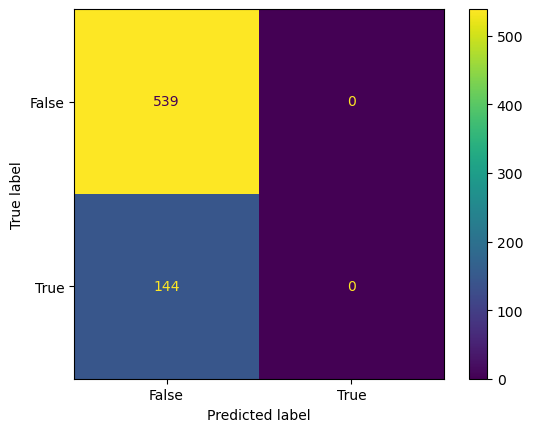

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
2
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


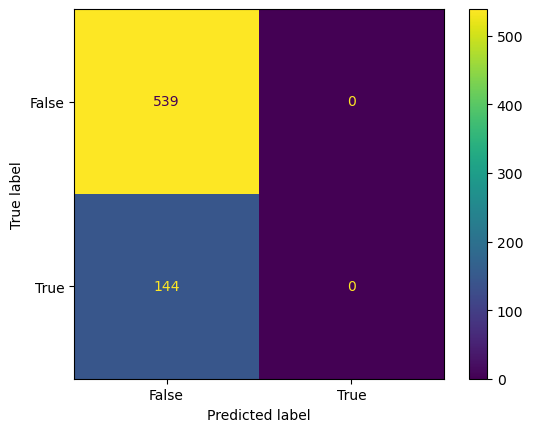

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
3
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


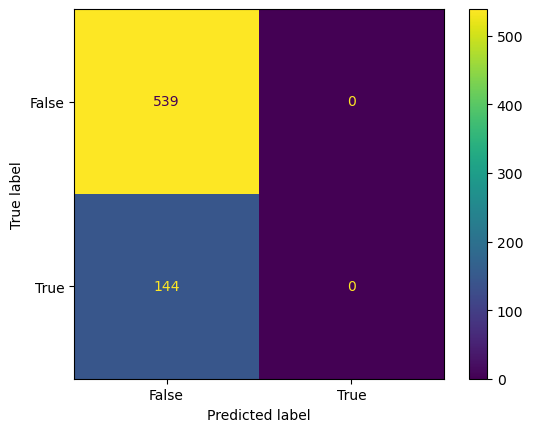

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
4
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


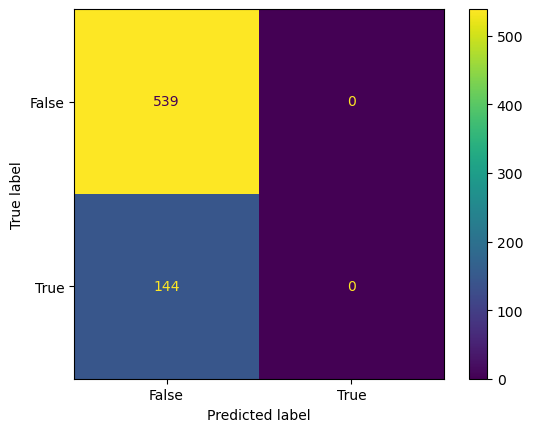

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
5
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


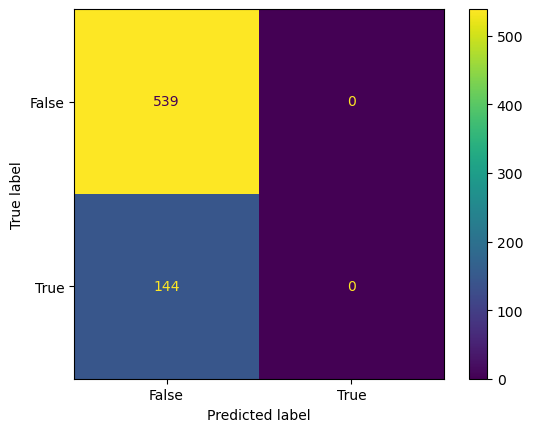

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
6
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


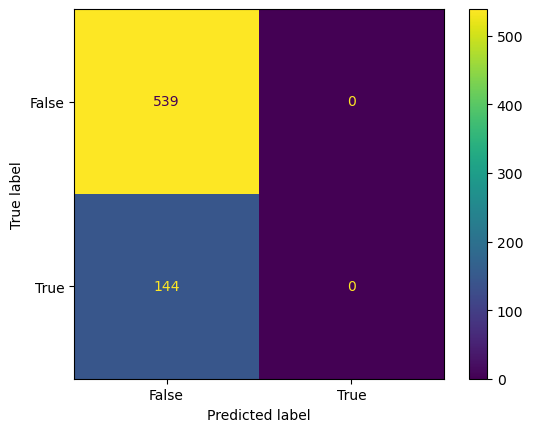

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
7
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


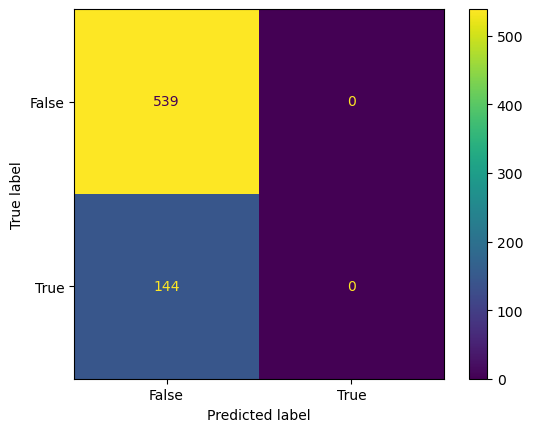

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
8
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


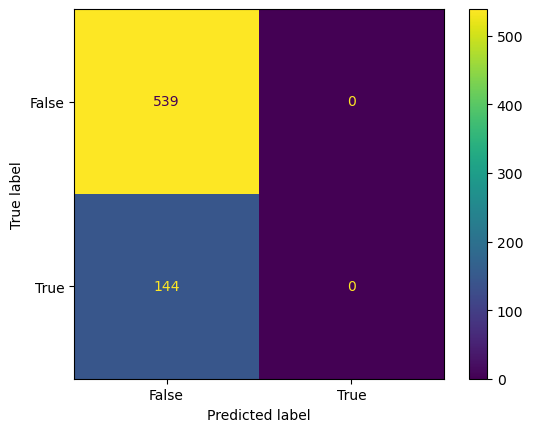

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
9
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


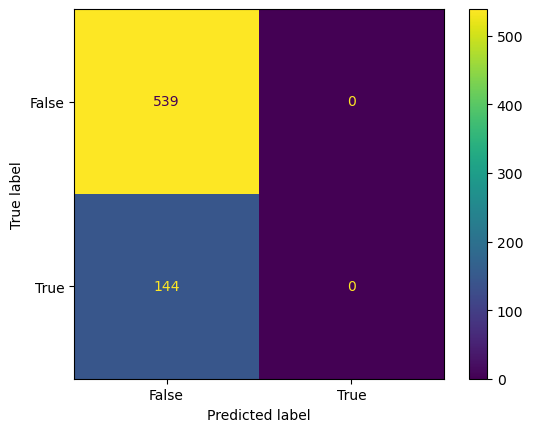

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
10
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


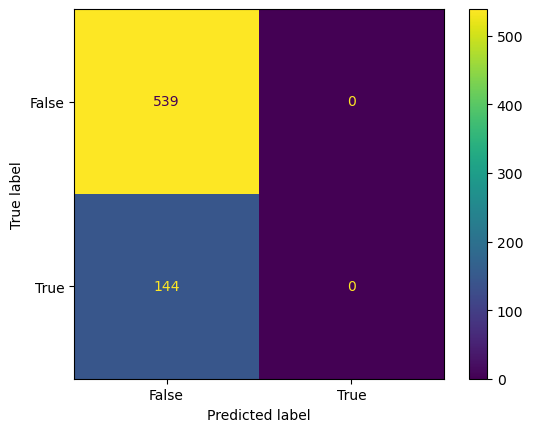

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier
1
Accuracy: 0.7730600292825769
Precision: 0.07692307692307693
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9777365491651205
F1-Score: 0.012738853503184714


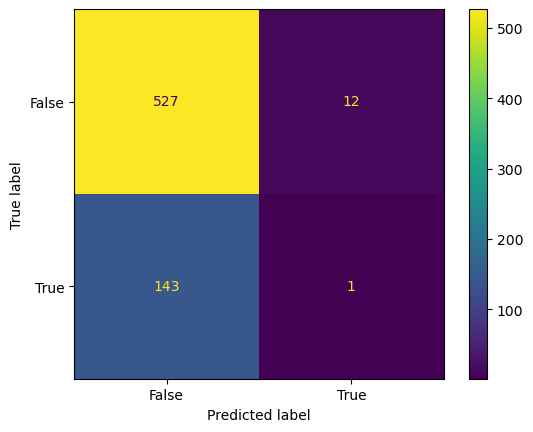

RandomForestClassifier
2
Accuracy: 0.7130307467057101
Precision: 0.2719298245614035
Recall (Sensitivity): 0.2152777777777778
Specificity: 0.8460111317254174
F1-Score: 0.24031007751937986


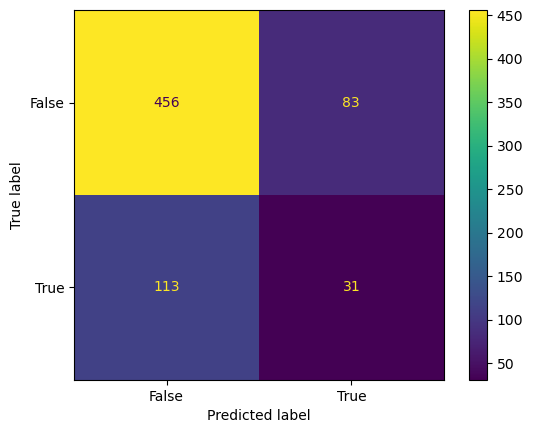

RandomForestClassifier
3
Accuracy: 0.7174231332357247
Precision: 0.14492753623188406
Recall (Sensitivity): 0.06944444444444445
Specificity: 0.8905380333951762
F1-Score: 0.09389671361502348


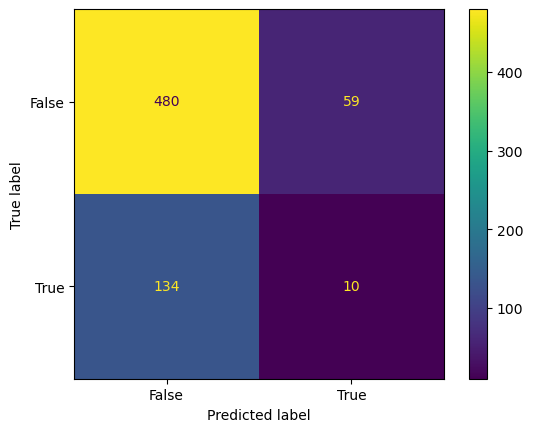

RandomForestClassifier
4
Accuracy: 0.7584187408491947
Precision: 0.26666666666666666
Recall (Sensitivity): 0.08333333333333333
Specificity: 0.9387755102040817
F1-Score: 0.12698412698412698


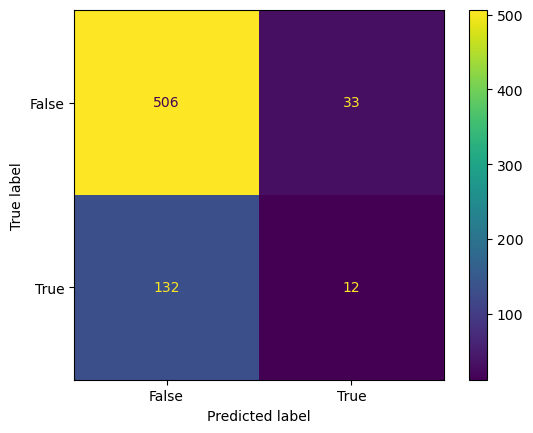

RandomForestClassifier
5
Accuracy: 0.7686676427525623
Precision: 0.28125
Recall (Sensitivity): 0.0625
Specificity: 0.9573283858998145
F1-Score: 0.10227272727272728


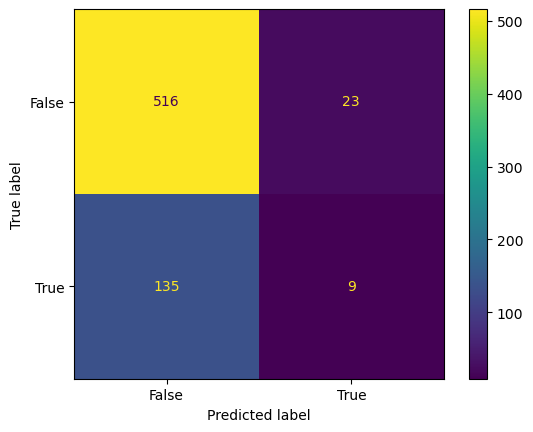

RandomForestClassifier
6
Accuracy: 0.7715959004392386
Precision: 0.3
Recall (Sensitivity): 0.0625
Specificity: 0.961038961038961
F1-Score: 0.10344827586206896


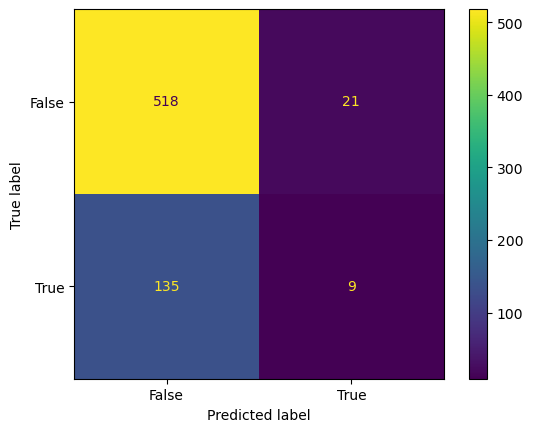

RandomForestClassifier
7
Accuracy: 0.7745241581259151
Precision: 0.32142857142857145
Recall (Sensitivity): 0.0625
Specificity: 0.9647495361781077
F1-Score: 0.10465116279069768


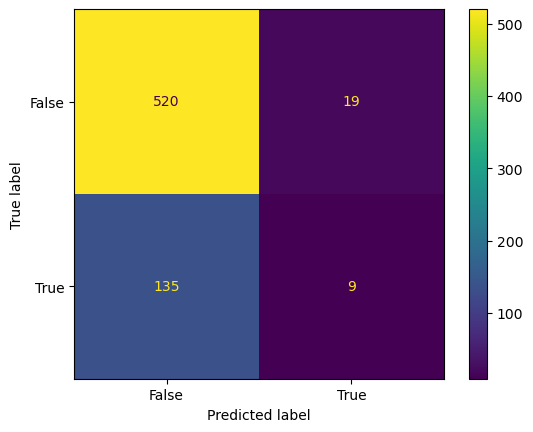

RandomForestClassifier
8
Accuracy: 0.7745241581259151
Precision: 0.25
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9721706864564007
F1-Score: 0.06097560975609757


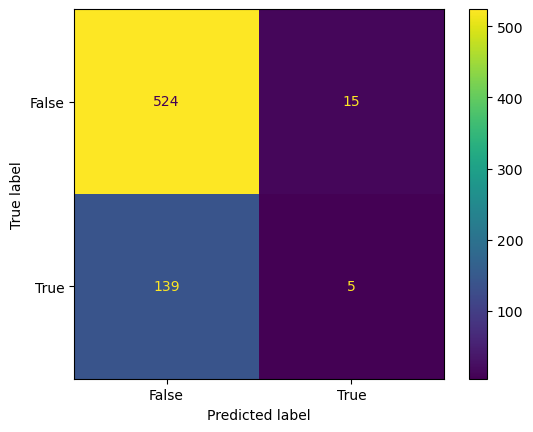

RandomForestClassifier
9
Accuracy: 0.7759882869692533
Precision: 0.30434782608695654
Recall (Sensitivity): 0.04861111111111111
Specificity: 0.9703153988868275
F1-Score: 0.08383233532934133


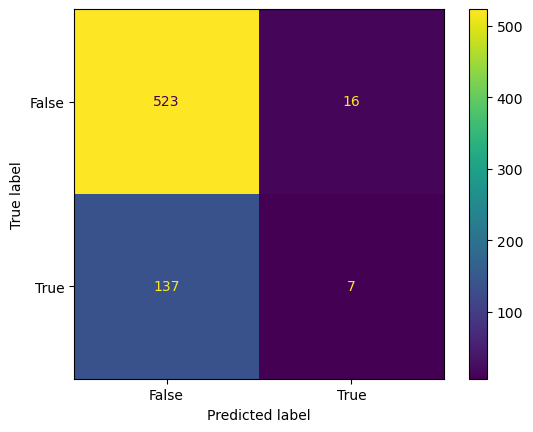

RandomForestClassifier
10
Accuracy: 0.7774524158125915
Precision: 0.21428571428571427
Recall (Sensitivity): 0.020833333333333332
Specificity: 0.9795918367346939
F1-Score: 0.0379746835443038


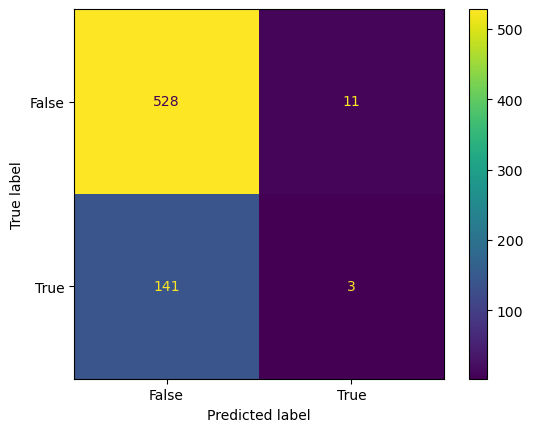

GradientBoostingClassifier
1
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


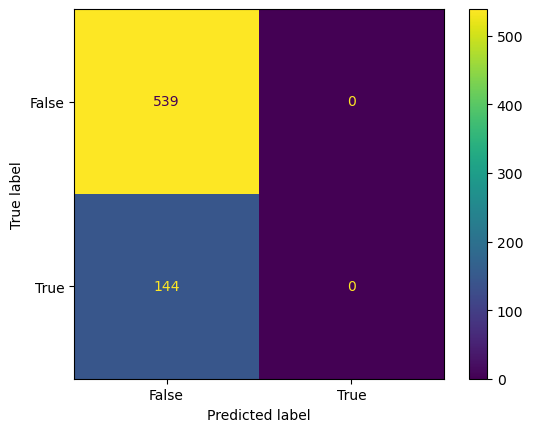

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier
2
Accuracy: 0.7818448023426061
Precision: 0.3333333333333333
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9814471243042672
F1-Score: 0.06289308176100629


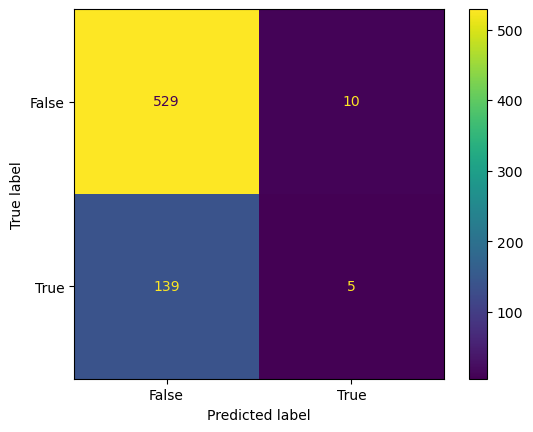

GradientBoostingClassifier
3
Accuracy: 0.780380673499268
Precision: 0.3333333333333333
Recall (Sensitivity): 0.041666666666666664
Specificity: 0.9777365491651205
F1-Score: 0.07407407407407407


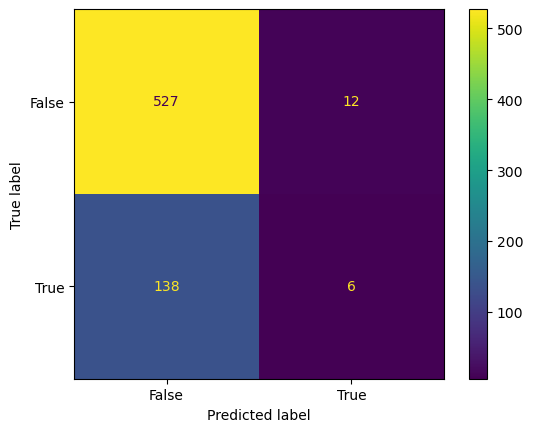

GradientBoostingClassifier
4
Accuracy: 0.7847730600292826
Precision: 0.38461538461538464
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9851576994434137
F1-Score: 0.06369426751592357


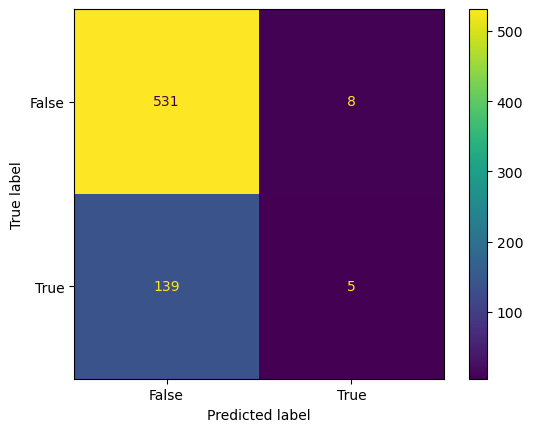

GradientBoostingClassifier
5
Accuracy: 0.7833089311859444
Precision: 0.35714285714285715
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9833024118738405
F1-Score: 0.06329113924050633


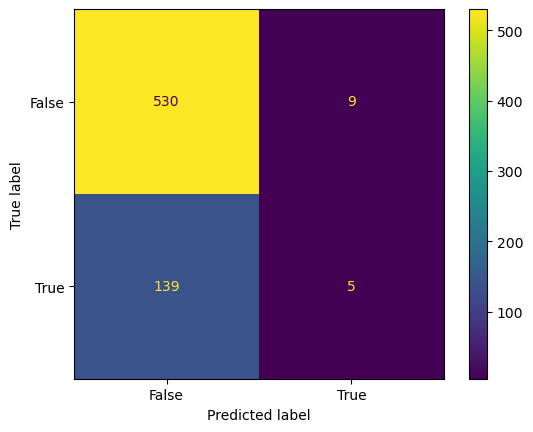

GradientBoostingClassifier
6
Accuracy: 0.7847730600292826
Precision: 0.36363636363636365
Recall (Sensitivity): 0.027777777777777776
Specificity: 0.987012987012987
F1-Score: 0.051612903225806445


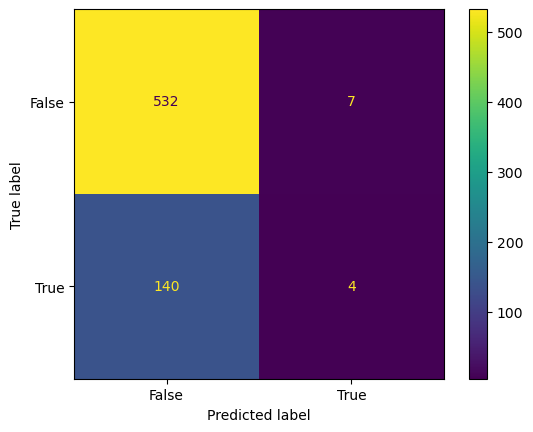

GradientBoostingClassifier
7
Accuracy: 0.7891654465592972
Precision: 0.5
Recall (Sensitivity): 0.041666666666666664
Specificity: 0.9888682745825603
F1-Score: 0.07692307692307693


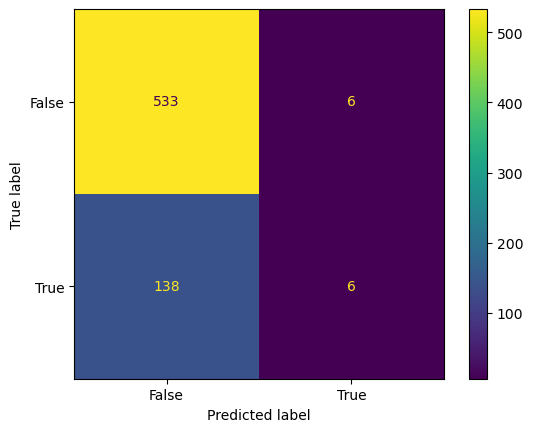

GradientBoostingClassifier
8
Accuracy: 0.7906295754026355
Precision: 0.5454545454545454
Recall (Sensitivity): 0.041666666666666664
Specificity: 0.9907235621521335
F1-Score: 0.07741935483870968


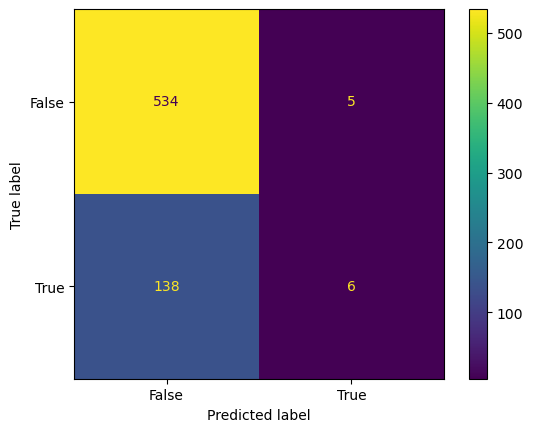

GradientBoostingClassifier
9
Accuracy: 0.7862371888726208
Precision: 0.4
Recall (Sensitivity): 0.027777777777777776
Specificity: 0.9888682745825603
F1-Score: 0.051948051948051945


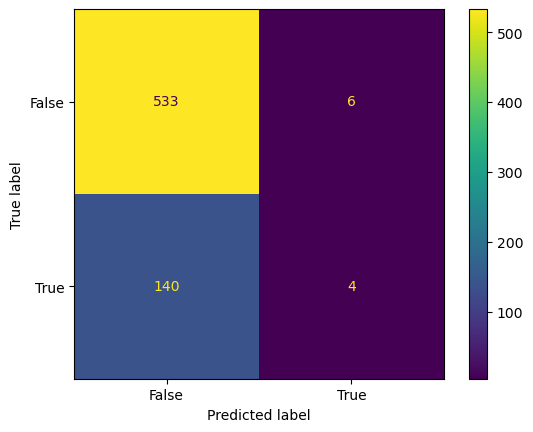

GradientBoostingClassifier
10
Accuracy: 0.7833089311859444
Precision: 0.3
Recall (Sensitivity): 0.020833333333333332
Specificity: 0.987012987012987
F1-Score: 0.03896103896103896


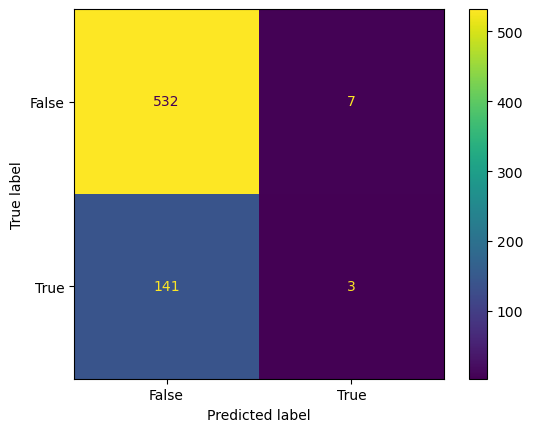

XGBClassifier
1
Accuracy: 0.7730600292825769
Precision: 0.07692307692307693
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9777365491651205
F1-Score: 0.012738853503184714


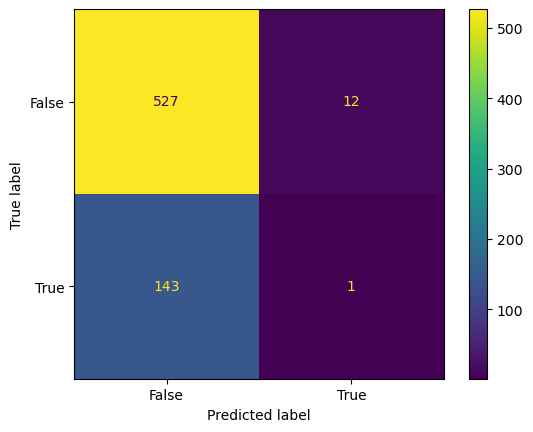

XGBClassifier
2
Accuracy: 0.7481698389458272
Precision: 0.32926829268292684
Recall (Sensitivity): 0.1875
Specificity: 0.8979591836734694
F1-Score: 0.2389380530973451


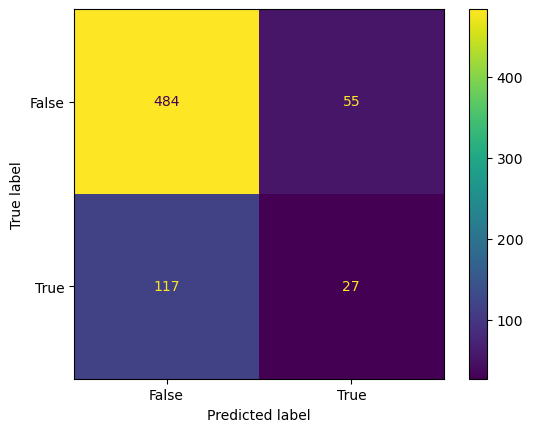

XGBClassifier
3
Accuracy: 0.7364568081991215
Precision: 0.29545454545454547
Recall (Sensitivity): 0.18055555555555555
Specificity: 0.8849721706864564
F1-Score: 0.2241379310344828


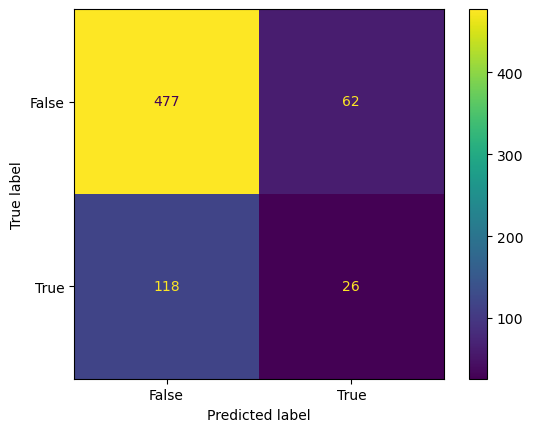

XGBClassifier
4
Accuracy: 0.718887262079063
Precision: 0.21428571428571427
Recall (Sensitivity): 0.125
Specificity: 0.8775510204081632
F1-Score: 0.15789473684210525


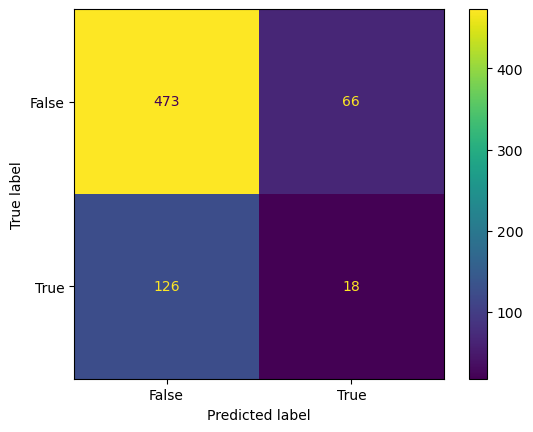

XGBClassifier
5
Accuracy: 0.7232796486090776
Precision: 0.25274725274725274
Recall (Sensitivity): 0.1597222222222222
Specificity: 0.8738404452690167
F1-Score: 0.1957446808510638


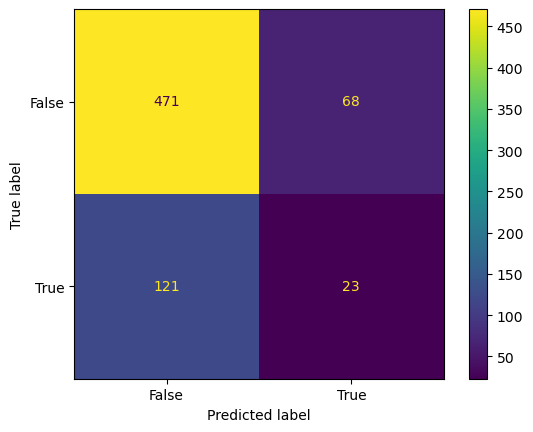

XGBClassifier
6
Accuracy: 0.7335285505124451
Precision: 0.27380952380952384
Recall (Sensitivity): 0.1597222222222222
Specificity: 0.8868274582560297
F1-Score: 0.20175438596491227


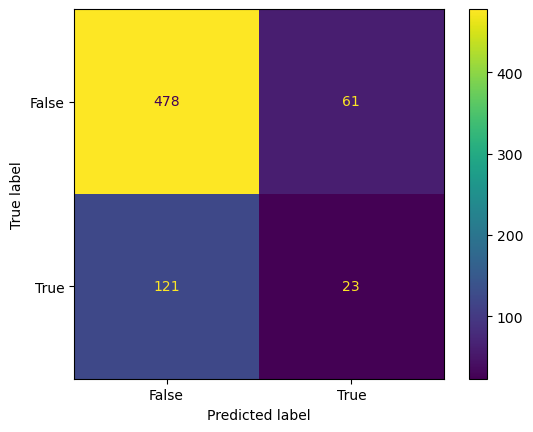

XGBClassifier
7
Accuracy: 0.7218155197657394
Precision: 0.19736842105263158
Recall (Sensitivity): 0.10416666666666667
Specificity: 0.8868274582560297
F1-Score: 0.13636363636363635


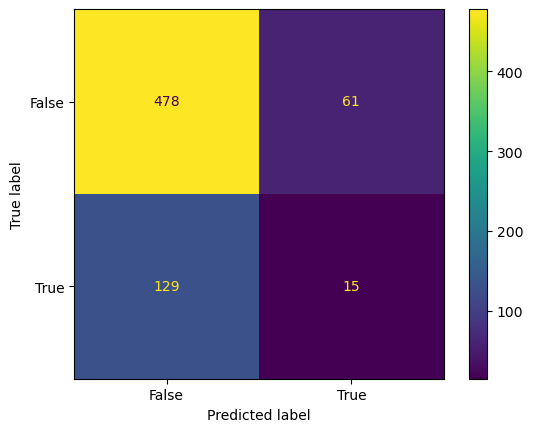

XGBClassifier
8
Accuracy: 0.7174231332357247
Precision: 0.19753086419753085
Recall (Sensitivity): 0.1111111111111111
Specificity: 0.8794063079777366
F1-Score: 0.14222222222222222


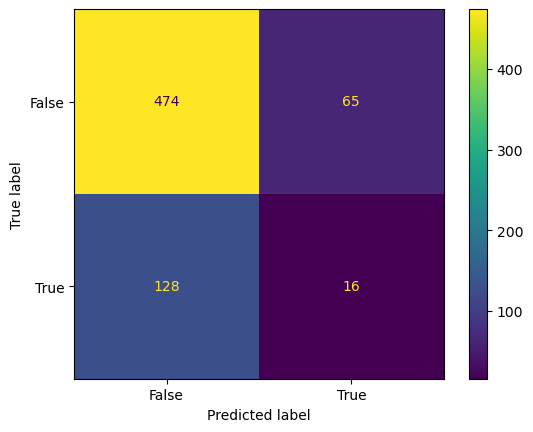

XGBClassifier
9
Accuracy: 0.7144948755490483
Precision: 0.16883116883116883
Recall (Sensitivity): 0.09027777777777778
Specificity: 0.8812615955473099
F1-Score: 0.11764705882352941


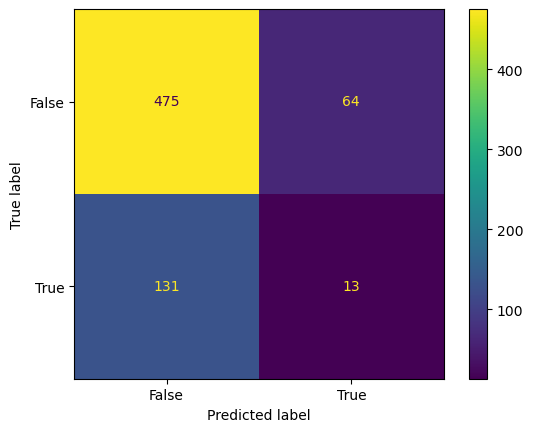

XGBClassifier
10
Accuracy: 0.7408491947291361
Precision: 0.2608695652173913
Recall (Sensitivity): 0.125
Specificity: 0.9053803339517625
F1-Score: 0.16901408450704225


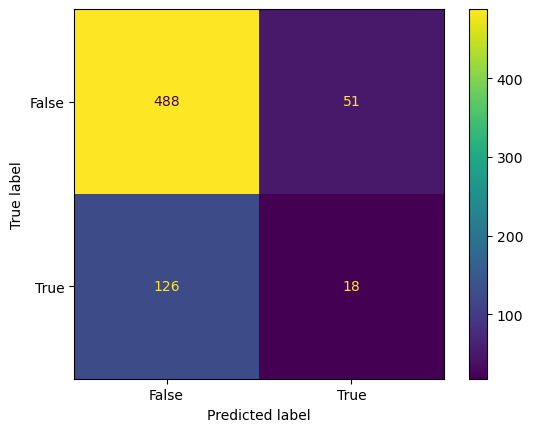

In [89]:
for fi_model in ['Gradient Boosting', 'Random Forest']:
    for model_name, model in models.items():
        for i in range(1, X.shape[1], 1):
            X_features = X[:,feature_importance_rf_gb[feature_importance_rf_gb['model']== fi_model].head(i)['feature_no'].to_list()]
            X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=28)
            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=28)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            print(model_name)
            print(i)
            scores(y_val, y_pred)
            confusion_matrix_(y_val,y_pred)
            
            cm = confusion_matrix(y_val, y_pred)
            tn, fp, fn, tp = cm.ravel()
            accuracy = accuracy_score(y_val, y_pred)
            precision = precision_score(y_val, y_pred)
            recall = recall_score(y_val, y_pred)
            specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
            f1 = f1_score(y_val, y_pred)
            
            results['Model'].append(model_name)
            results['Accuracy'].append(accuracy)
            results['Precision'].append(precision)
            results['Recall'].append(recall)
            results['Specificity'].append(specificity)
            results['F1 Score'].append(f1)
            results['n_features'].append(i)
            results['fp'].append(fp)
            results['tp'].append(tp)
            results['tn'].append(tn)
            results['fn'].append(fn)
            results['fi_model'].append(fi_model)




# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

In [90]:
results_df = results_df.drop_duplicates()

In [91]:
results_df.groupby(['Model'])["F1 Score"].agg(['max']).sort_values(['max'], ascending=False)

,max
Model,
DecisionTreeClassifier,0.304878
RandomForestClassifier,0.248927
XGBClassifier,0.240000
KNeighborsClassifier,0.180180
GradientBoostingClassifier,0.077419
GaussianNB,0.000000
LogisticRegression,0.000000
SVC,0.000000


In [92]:
max_f1_scores = results_df.groupby('Model')['F1 Score'].transform(max)
max_f1_rows = results_df[results_df['F1 Score'] == max_f1_scores]

In [93]:
max_f1_rows.loc[(max_f1_rows['F1 Score']>0) & (max_f1_rows['tn'] > 1)].sort_values(by=['F1 Score'], ascending=False)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,n_features,fp,tp,tn,fn,fi_model
22,DecisionTreeClassifier,0.666179,0.271739,0.347222,0.751391,0.304878,3,134,50,405,94,Gradient Boosting
52,RandomForestClassifier,0.743777,0.325843,0.201389,0.888683,0.248927,3,60,29,479,115,Gradient Boosting
72,XGBClassifier,0.749634,0.333333,0.187500,0.899814,0.240000,3,54,27,485,117,Gradient Boosting
114,KNeighborsClassifier,0.733529,0.256410,0.138889,0.892393,0.180180,5,58,20,481,124,Random Forest
64,GradientBoostingClassifier,0.790630,0.545455,0.041667,0.990724,0.077419,5,5,6,534,138,Gradient Boosting
147,GradientBoostingClassifier,0.790630,0.545455,0.041667,0.990724,0.077419,8,5,6,534,138,Random Forest


In [94]:
results_df.to_csv('model_performance.csv')

<font face='Comfortaa'>
    With the primary goal of identifying valuable leads, the key performance metric to evaluate the current model is the F1 score along with the count of false positives. Although the Gaussian Naive Bayes model achieves a higher F1 score, it exhibits a relatively high number of false positives. Consequently, the DecisionTreeClassifier, which employs only 20 features and yields an F1 score of 0.28 with 133 false positives, is deemed acceptable at this stage. In the case of the XGBClassifier, it requires only 5 features and already delivers an F1 score of 0.21 with 51 false positives. The next step involves fine-tuning the hyperparameters of both the DecisionTreeClassifier and XGBClassifier

<font face='Comfortaa'> Features selected from Random Forest performed better than Gradient Boosting resulted feature importance

<font face='Comfortaa'><h4> 6.1.4 Hyperparameter Tuning

<font face='Comfortaa'><h5> 6.1.4 (a) DecisionTreeClassifier

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [97]:
X_features = X[:,feature_importance_rf_gb[feature_importance_rf_gb['model']== 'Gradient Boosting'].head(3)['feature_no'].to_list()]
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=28)

In [98]:
dt_classifier = DecisionTreeClassifier(random_state = 28)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_val)

In [99]:
scores(y_val, y_pred)

Accuracy: 0.6661786237188873
Precision: 0.2717391304347826
Recall (Sensitivity): 0.3472222222222222
Specificity: 0.75139146567718
F1-Score: 0.3048780487804878


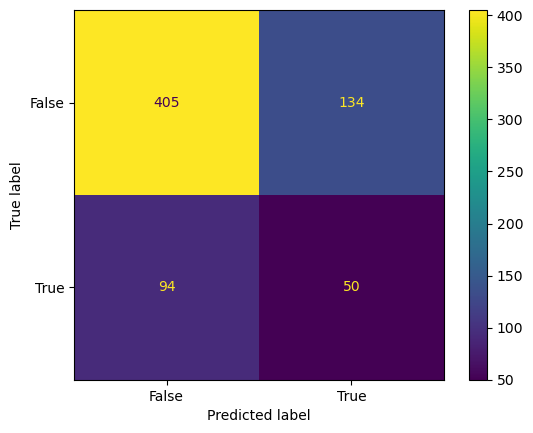

In [100]:
confusion_matrix_(y_val,y_pred)

In [101]:
X_features = X[:,feature_importance_rf_gb[feature_importance_rf_gb['model']== 'Random Forest'].head(3)['feature_no'].to_list()]
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=28)

best_dt_classifier = DecisionTreeClassifier(random_state = 28)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid_search = GridSearchCV(best_dt_classifier, param_grid, cv=5, n_jobs=-1, verbose=1, scoring = 'f1')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [102]:
y_pred = best_classifier.predict(X_val)

In [103]:
scores(y_val, y_pred)

Accuracy: 0.6603221083455344
Precision: 0.21052631578947367
Recall (Sensitivity): 0.2222222222222222
Specificity: 0.7773654916512059
F1-Score: 0.21621621621621623


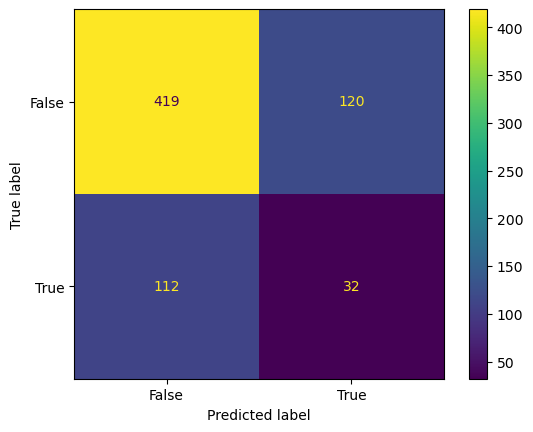

In [104]:
confusion_matrix_(y_val,y_pred)

<font face='Comfortaa'><h4> 6.1.4 (b) Random Forest Classifier

In [105]:
X_features = X[:,feature_importance_rf_gb[feature_importance_rf_gb['model']== 'Gradient Boosting'].head(3)['feature_no'].to_list()]
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=28)

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state= 28)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_val)

In [107]:
scores(y_val, y_pred)

Accuracy: 0.7437774524158126
Precision: 0.3258426966292135
Recall (Sensitivity): 0.2013888888888889
Specificity: 0.8886827458256029
F1-Score: 0.24892703862660942


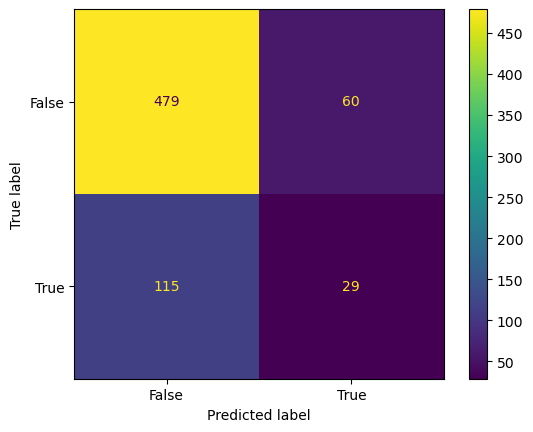

In [108]:
confusion_matrix_(y_val,y_pred)

In [109]:
X_features = X[:,feature_importance_rf_gb[feature_importance_rf_gb['model']== 'Gradient Boosting'].head(3)['feature_no'].to_list()]
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=28)

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [111]:
# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=28)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],   # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
}


In [112]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           scoring='f1', cv=5, n_jobs=-1)


In [113]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=28), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [114]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [115]:
y_pred = best_model.predict(X_test)

In [116]:
scores(y_val, y_pred)

Accuracy: 0.7335285505124451
Precision: 0.24324324324324326
Recall (Sensitivity): 0.125
Specificity: 0.8961038961038961
F1-Score: 0.1651376146788991


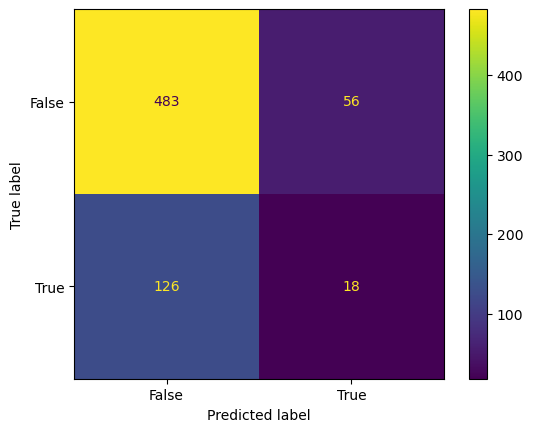

In [117]:
confusion_matrix_(y_val,y_pred)

<font face='Comfortaa'><h4> 6.1.4 (c) XGBClassifier

In [118]:
from xgboost import XGBClassifier

In [119]:
X_features = X[:,feature_importance_rf_gb[feature_importance_rf_gb['model']== 'Random Forest'].head(3)['feature_no'].to_list()]
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=28)

In [120]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

In [121]:
scores(y_val, y_pred)

Accuracy: 0.7364568081991215
Precision: 0.29545454545454547
Recall (Sensitivity): 0.18055555555555555
Specificity: 0.8849721706864564
F1-Score: 0.2241379310344828


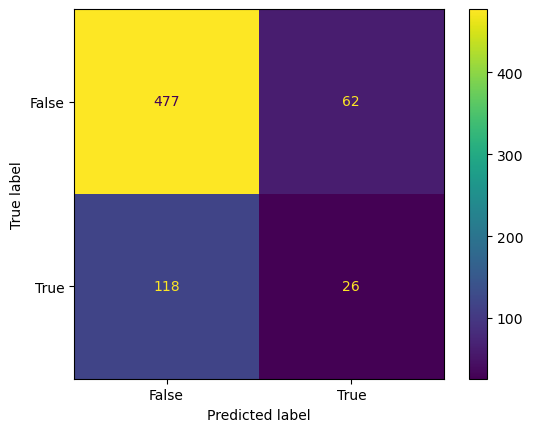

In [122]:
confusion_matrix_(y_val,y_pred)

In [123]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define your XGBoost classifier
xgb_classifier = XGBClassifier()

# Create a parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage used in boosting
    'max_depth': [3, 4, 5],               # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],        # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2],               # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': [0.8, 0.9, 1.0],         # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='f1', cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_xgb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the model on your test data
y_pred = best_xgb_classifier.predict(X_val)  # X_test is your test data
f1_score_ = f1_score(y_test, y_pred)  # Calculate the F1 score on the test data
print("F1 Score on Test Data:", f1_score_)

Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}
F1 Score on Test Data: 0.14232209737827714


In [124]:
scores(y_val, y_pred)

Accuracy: 0.7115666178623719
Precision: 0.2376237623762376
Recall (Sensitivity): 0.16666666666666666
Specificity: 0.8571428571428571
F1-Score: 0.19591836734693877


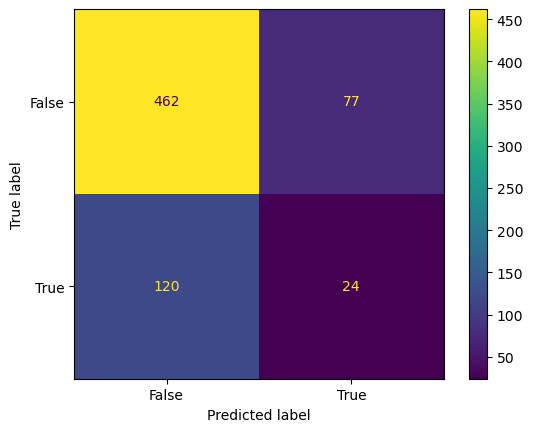

In [125]:
confusion_matrix_(y_val,y_pred)

<font face='Comfortaa'> Both models exhibit diminished performance after undergoing hyperparameter tuning. When analyzing all the metrics, the DecisionTreeClassifier, which achieved a higher F1 score and fewer False Positives before hyperparameter tuning, emerges as the superior overall model. This aligns with the primary objective of predicting high-value leads within the customer pool. It underscores the significance of correctly identifying these high-value leads (recall) since failing to do so could lead to missed opportunities. Nevertheless, it remains crucial to reduce false positives to prevent the allocation of resources to leads that do not genuinely hold high value.

<font face='Comfortaa'><h2> 7 Testing Data

In [126]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state = 28)

X_features = X[:,feature_importance_rf_gb[feature_importance_rf_gb['model']== 'Random Forest'].head(5)['feature_no'].to_list()]
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=28)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

In [127]:
scores(y_test, y_pred)

Accuracy: 0.6222547584187409
Precision: 0.2676767676767677
Recall (Sensitivity): 0.3192771084337349
Specificity: 0.7195357833655706
F1-Score: 0.2912087912087912


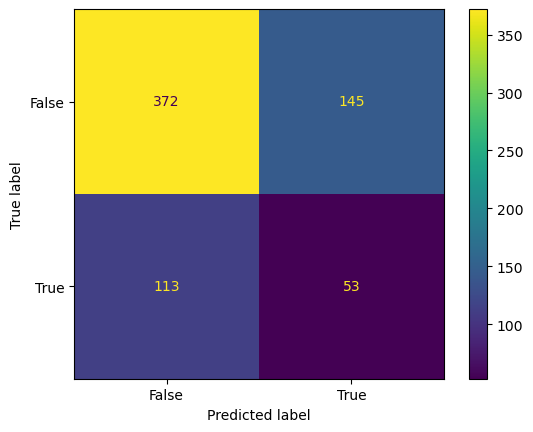

In [128]:
confusion_matrix_(y_test,y_pred)

<font face='Comfortaa'><h2> 8 Predict New Customer List

In [129]:
NewCustomerList = dfs['NewCustomerList']

In [130]:
NewCustomerList = NewCustomerList.loc[:, 'gender':'property_valuation']

In [131]:
NewCustomerList = NewCustomerList.drop(axis=1, columns=['job_title', 'job_industry_category','deceased_indicator', 'address', 'postcode', 'country'])

In [132]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   gender                               1000 non-null   object
 1   past_3_years_bike_related_purchases  1000 non-null   object
 2   DOB                                  983 non-null    object
 3   wealth_segment                       1000 non-null   object
 4   owns_car                             1000 non-null   object
 5   tenure                               1000 non-null   object
 6   state                                1000 non-null   object
 7   property_valuation                   1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [133]:
#category
NewCustomerList['gender'] = NewCustomerList['gender'].astype('category')
NewCustomerList['wealth_segment'] = NewCustomerList['wealth_segment'].astype('category')
NewCustomerList['owns_car'] = NewCustomerList['owns_car'].astype('category')
NewCustomerList['state'] = NewCustomerList['state'].astype('category')

#int
NewCustomerList['past_3_years_bike_related_purchases'] = NewCustomerList['past_3_years_bike_related_purchases'].astype('int')
NewCustomerList['tenure'] = NewCustomerList['tenure'].astype('int')
NewCustomerList['property_valuation'] = NewCustomerList['property_valuation'].astype('int')

#date
NewCustomerList['DOB'] = pd.to_datetime(NewCustomerList['DOB'])


In [134]:
NewCustomerList['age'] = last_transaction_date.year - NewCustomerList['DOB'].dt.year

In [135]:
NewCustomerList['age'].median()

45.0

In [136]:
NewCustomerList['age'] = NewCustomerList['age'].fillna(45.0)

In [137]:
NewCustomerList = NewCustomerList.drop(axis=1, columns=['DOB'])

In [138]:
NewCustomerList = NewCustomerList[['past_3_years_bike_related_purchases', 'tenure', 'property_valuation' , 'age', \
                                   'gender', 'wealth_segment', 'owns_car', 'state']]

In [139]:
features_new = pd.get_dummies(NewCustomerList, drop_first = True)

In [140]:
features_cat = features_new.iloc[:, 4:]
features_num = features_new.iloc[:, :4]

In [141]:
X_num = features_num.values
X_cat = features_cat.values

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [143]:
X_num = scaler.fit_transform(X_num)
X = np.concatenate((X_num, X_cat), axis = 1)

In [144]:
X_features = X[:,feature_importance_rf_gb[feature_importance_rf_gb['model']== 'Random Forest'].head(5)['feature_no'].to_list()]

In [145]:
y_pred = dt_classifier.predict(X_features)

In [146]:
NewCustomerList['y_pred'] = y_pred

In [147]:
NewCustomerList['y_pred'].value_counts()

0    700
1    300
Name: y_pred, dtype: int64

In [148]:
NewCustomerList.to_csv('predicted_customer.csv')